In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# from sklearn.preprocessing import ColumnTransformer

from datetime import datetime, timedelta

# Data Visulization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy import stats


# Data Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample


import socket
import struct
import random
import ipaddress

from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from fast_ml.model_development import train_valid_test_split

# %load_ext tensorboard
# %tensorboard --logdir "E:\Projects\One Game Inc"

# Experimentation with IP Address variable---

In [3]:
import ipaddress
ip_address = "192.168.1.1"

address = ipaddress.ip_address(ip_address)

print(address)

192.168.1.1


In [3]:
import requests
import json

# IP address to test
ip_address = '147.229.2.90'


request_url = 'https://geolocation-db.com/jsonp/' + ip_address
response = requests.get(request_url)
result = response.content.decode()
result = result.split("(")[1].strip(")")
result  = json.loads(result)
print(result)

{'country_code': 'CZ', 'country_name': 'Czechia', 'city': 'Brno', 'postal': '614 00', 'latitude': 49.2333, 'longitude': 16.65, 'IPv4': '147.229.2.90', 'state': 'Mesto Brno'}


In [4]:
import requests

def get_geolocation_info(validated_ip_address):
    try:
        url = f"https://ipgeolocation.abstractapi.com/v1/?api_key=YOUR_API_KEY&ip_address={validated_ip_address}"
        response = requests.get(url)
        print(response.content)
    except requests.exceptions.RequestException as api_error:
        print(f"There was an error contacting the Geolocation API: {api_error}")
        raise SystemExit(api_error)

In [5]:
get_geolocation_info

<function __main__.get_geolocation_info(validated_ip_address)>

In [86]:
import requests

api_url = "https://ipgeolocation.abstractapi.com/v1/"
api_key = "YOUR_API_KEY"

def get_geolocation_info(validated_ip_address):
    params = {
        'api_key': api_key,
        'ip_address': validated_ip_address
    }
    try:
        response = requests.get(api_url, params=params)
        print(response.content)
    except requests.exceptions.RequestException as api_error:
        print(f"There was an error contacting the Geolocation API: {api_error}")
        raise SystemExit(api_error)

In [10]:
import requests


def get_ip():
    response = requests.get('https://api64.ipify.org?format=json').json()
    return response["ip"]


def get_location():
    ip_address = get_ip()
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name")
    }
    return location_data


print(get_location())

{'ip': '117.212.241.33', 'city': 'Pune', 'region': 'Maharashtra', 'country': 'India'}


In [12]:
import json
from urllib.request import urlopen  # Use urllib.request for Python 3

url = 'http://ipinfo.io/json'
response = urlopen(url)
data = json.load(response)

IP = data['ip']
org = data['org']
city = data['city']
country = data['country']
region = data['region']

print('IP details\n')
print('IP : {4} \nRegion : {1} \nCountry : {2} \nCity : {3} \nOrg : {0}'.format(org, region, country, city, IP))

IP details

IP : 117.212.241.33 
Region : Maharashtra 
Country : IN 
City : Pune 
Org : AS9829 National Internet Backbone


In [13]:
import requests

response = requests.get("https://geolocation-db.com/json/39.110.142.79 & position=true").json()
response

{'country_code': 'IN',
 'country_name': 'India',
 'city': 'Khargone',
 'postal': '451001',
 'latitude': 21.8167,
 'longitude': 75.6,
 'IPv4': '117.212.241.33',
 'state': 'Madhya Pradesh'}

In [17]:
import geocoder

# Assign IP address to a variable
ip = geocoder.ip("161.205.160.93")

# Obtain the city
print(ip.city)

# Obtain the coordinates
print(ip.latlng)

Atlanta
[33.7718, -84.3757]


In [108]:
import folium

# Create a map centered around specific coordinates
map_center = [51.5074, -0.1278]  # London coordinates
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for specific locations
marker1 = folium.Marker(location=[51.5074, -0.1278], popup='London')
marker2 = folium.Marker(location=[40.7128, -74.0060], popup='New York City')

# Add markers to the map
mymap.add_child(marker1)
mymap.add_child(marker2)

# Display the map
mymap.save("my_map.html")  # Save the map as an HTML file
mymap

# Importing the Dataset ---

In [4]:
#df = "E:/Projects/user_data.csv"

df = pd.read_csv("E:/Projects/One Game Inc/Fraud Detection - User Signup.csv")
df

User_ID   IP_Address  No_of_Users_Per_IP_Address Device_Signature  \
0          1  111.111.1.1                          20            abcd1   
1          2  111.111.1.1                          20            abcd2   
2          3  111.111.1.1                          20            abcd3   
3          4  111.111.1.1                          20            abcd4   
4          5  111.111.1.1                          20            abcd5   
..       ...          ...                         ...              ...   
995      996  111.203.9.1                           1          abcd976   
996      997  111.203.9.2                           1          abcd977   
997      998  111.203.9.3                           1          abcd978   
998      999  111.203.9.4                           1          abcd979   
999     1000  111.203.9.5                           1          abcd980   

     No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  \
0                                   1                          997   
1                                   1                          623   
2                                   1                          459   
3                                   1                          602   
4                                   1                          552   
..                                ...                          ...   
995                                 1                          229   
996                                 1                          470   
997                                 1                          393   
998                                 1                          145   
999                                 1                          743   

     Time_Difference_Between_Clicks  Geo_Location_US_Score  \
0                                37                      1   
1                                58                      0   
2                                44                      0   
3                                83                      0   
4                                72                      1   
..                              ...                    ...   
995                              14                      0   
996                               3                      0   
997                              73                      0   
998                              43                      0   
999                              84                      0   

     Fraud_Flag_IP_Address  Fraud_Flag_Device_Signature  \
0                        1                            0   
1                        1                            0   
2                        1                            0   
3                        1                            0   
4                        1                            0   
..                     ...                          ...   
995                      0                            0   
996                      0                            0   
997                      0                            0   
998                      0                            0   
999                      0                            0   

     Fraud_Flag_Time_Spent_Registration  Fraud_Flag_Click_Frequencies  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
..                                  ...                           ...   
995                                   0                             0   
996                                   0                             0   
997                                   0                             0   
998                                   0                             0   
999               

# Data Manipulation ---

## Generating Dummy/Random IP Addresses

In [3]:
# Set a seed for Reproducibility---
random.seed(42)  # Replace 42 with any seed value you prefer

# Generate 990 random IP addresses
random_ips = [f"{random.randint(1, 255)}.{random.randint(1, 255)}.{random.randint(1, 255)}.{random.randint(1, 255)}" for _ in range(980)]

# Create a list of 20 repeated IP addresses
repeated_ips = ['192.168.1.1'] * 20  # Replace '192.168.1.1' with your desired repeated IP address

# Concatenate the lists for IP addresses
ip_addresses = repeated_ips + random_ips

# Update the 'IP Address' column in the DataFrame
df['IP_Address'] = ip_addresses
df

User_ID       IP_Address  No_of_Users_Per_IP_Address Device_Signature  \
0          1      192.168.1.1                          20            abcd1   
1          2      192.168.1.1                          20            abcd2   
2          3      192.168.1.1                          20            abcd3   
3          4      192.168.1.1                          20            abcd4   
4          5      192.168.1.1                          20            abcd5   
..       ...              ...                         ...              ...   
995      996     194.6.251.77                           1          abcd976   
996      997  119.173.185.140                           1          abcd977   
997      998   109.137.98.211                           1          abcd978   
998      999     59.64.118.89                           1          abcd979   
999     1000     40.71.49.240                           1          abcd980   

     No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  \
0                                   1                          997   
1                                   1                          623   
2                                   1                          459   
3                                   1                          602   
4                                   1                          552   
..                                ...                          ...   
995                                 1                          229   
996                                 1                          470   
997                                 1                          393   
998                                 1                          145   
999                                 1                          743   

     Time_Difference_Between_Clicks  Geo_Location_US_Score  \
0                                37                      1   
1                                58                      0   
2                                44                      0   
3                                83                      0   
4                                72                      1   
..                              ...                    ...   
995                              14                      0   
996                               3                      0   
997                              73                      0   
998                              43                      0   
999                              84                      0   

     Fraud_Flag_IP_Address  Fraud_Flag_Device_Signature  \
0                        1                            0   
1                        1                            0   
2                        1                            0   
3                        1                            0   
4                        1                            0   
..                     ...                          ...   
995                      0                            0   
996                      0                            0   
997                      0                            0   
998                      0                            0   
999                      0                            0   

     Fraud_Flag_Time_Spent_Registration  Fraud_Flag_Click_Frequencies  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
..                                  ...                           ...   
995                                   0                             0   
996                                   0                             0   
997                                   0                             0   
998                                   0    

In [4]:
# Listing of the rows with Repeated/Non-Unique/ Duplicate IP Addresses---

ids = df["IP_Address"]
df[ids.isin(ids[ids.duplicated()])].sort_values("IP_Address")

User_ID   IP_Address  No_of_Users_Per_IP_Address Device_Signature  \
0         1  192.168.1.1                          20            abcd1   
17       18  192.168.1.1                          20           abcd18   
16       17  192.168.1.1                          20           abcd17   
15       16  192.168.1.1                          20           abcd16   
14       15  192.168.1.1                          20           abcd15   
13       14  192.168.1.1                          20           abcd14   
12       13  192.168.1.1                          20           abcd13   
11       12  192.168.1.1                          20           abcd12   
10       11  192.168.1.1                          20           abcd11   
9        10  192.168.1.1                          20           abcd10   
8         9  192.168.1.1                          20            abcd9   
7         8  192.168.1.1                          20            abcd8   
6         7  192.168.1.1                          20            abcd7   
5         6  192.168.1.1                          20            abcd6   
4         5  192.168.1.1                          20            abcd5   
3         4  192.168.1.1                          20            abcd4   
2         3  192.168.1.1                          20            abcd3   
1         2  192.168.1.1                          20            abcd2   
18       19  192.168.1.1                          20           abcd19   
19       20  192.168.1.1                          20           abcd20   

    No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  \
0                                  1                          997   
17                                 1                          328   
16                                 1                           95   
15                                 1                          405   
14                                 1                          897   
13                                 1                          422   
12                                 1                          655   
11                                 1                          720   
10                                 1                          348   
9                                  1                          609   
8                                  1                          719   
7                                  1                           61   
6                                  1                          825   
5                                  1                          986   
4                                  1                          552   
3                                  1                          602   
2                                  1                          459   
1                                  1                          623   
18                                 1                          699   
19                                 1                          810   

    Time_Difference_Between_Clicks  Geo_Location_US_Score  \
0                               37                      1   
17                              94                      1   
16                              66                      0   
15                              43                      0   
14                              51                      0   
13                              87                      0   
12                              58                      0   
11                               3                      1   
10                              20                      0   
9                               63                      1   
8                               40                      0   
7                               24                      1   
6                               96                      0   
5                               13                      1   
4                               72                      1   
3                               83          

In [5]:
# Function to check the validity of IP addresses---

def validate_ip(ip):
    try:
        ipaddress.ip_address(ip)
        return True  # Valid IP address
    except ValueError:
        return False  # Invalid IP address

# Apply the validation function to the 'IP_Address' column
validity_check = df['IP_Address'].apply(validate_ip)

# Filter the DataFrame for invalid IP addresses
invalid_ips = df[~validity_check]

# Display the rows with invalid IP addresses
print("Rows with invalid IP addresses:")
print(invalid_ips)

# To check the Validity of the IP Addresses

# df['IP_Address'] = df['IP_Address'].apply(lambda x: ipaddress.ip_address(x).is_global)
# df['IP_Address']

Rows with invalid IP addresses:
Empty DataFrame
Columns: [User_ID, IP_Address, No_of_Users_Per_IP_Address, Device_Signature, No_of_Users_Per_Device_Signature, Time_Spent_for_Registration, Time_Difference_Between_Clicks, Geo_Location_US_Score, Fraud_Flag_IP_Address, Fraud_Flag_Device_Signature, Fraud_Flag_Time_Spent_Registration, Fraud_Flag_Click_Frequencies, Fraud_Flag_Geolocation, Fraud_Flag_Overall, Fraud_Flag_Severity, Event_Label, Prospective_Risk]
Index: []


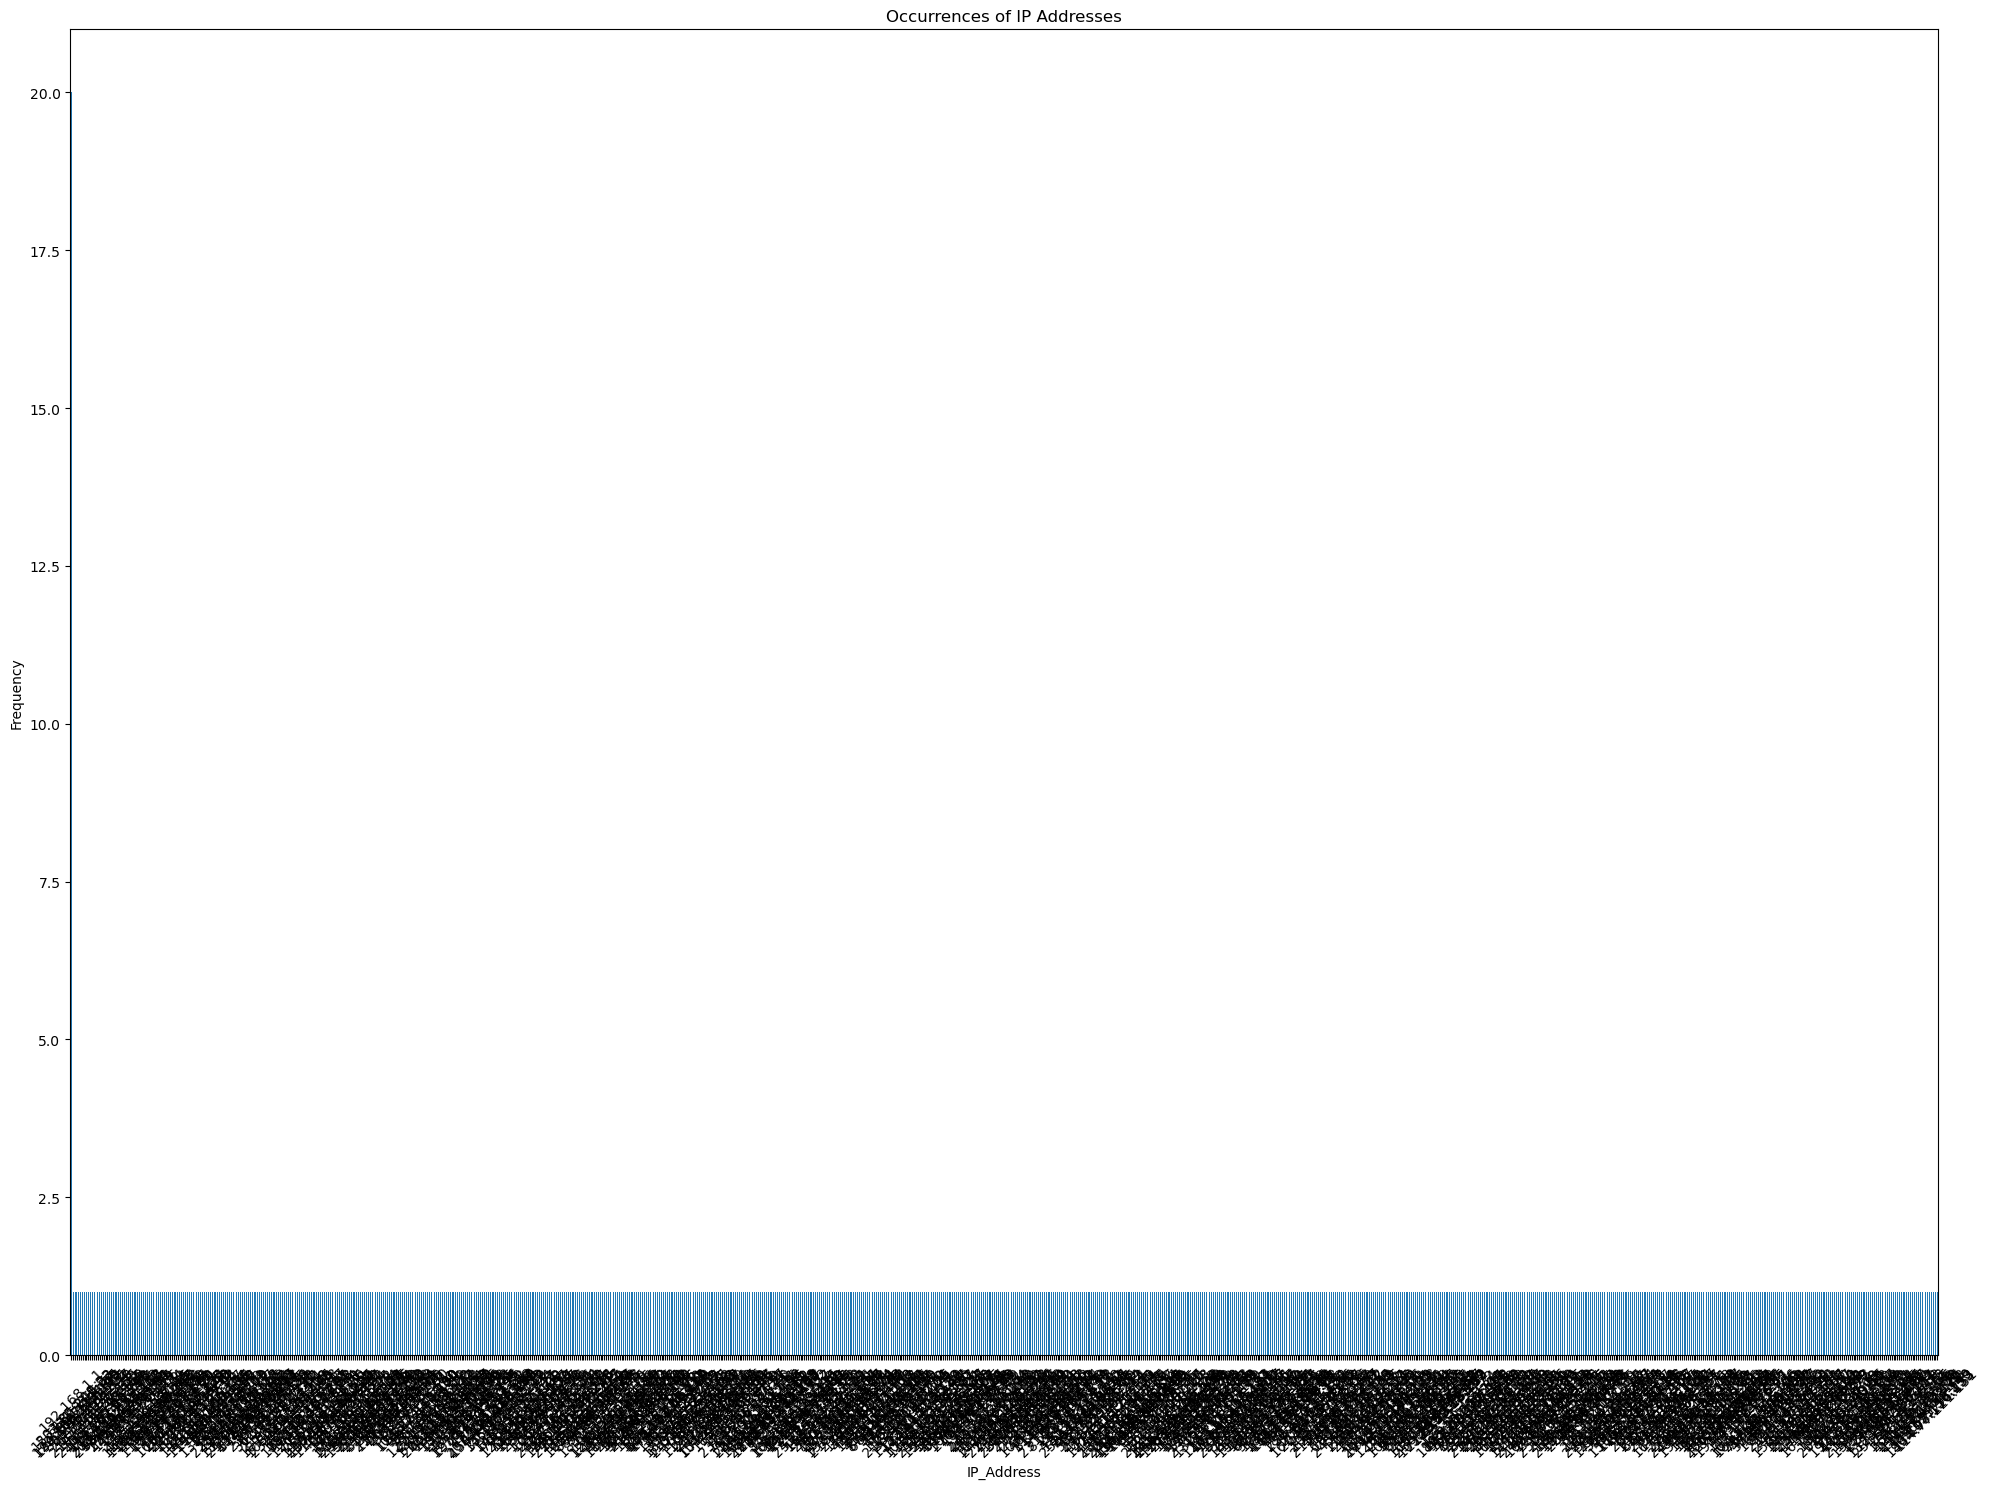

In [6]:
# Count occurrences of each unique IP address
ip_counts = df['IP_Address'].value_counts()

# Plotting the IP addresses and their occurrences
plt.figure(figsize=(20, 15))
ip_counts.plot(kind='bar')
plt.xlabel('IP_Address')
plt.ylabel('Frequency')
plt.title('Occurrences of IP Addresses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [57]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Function to plot IP address occurrences based on threshold
def plot_ip_counts(threshold):
    # Filter IP counts based on the threshold
    filtered_ip_counts = ip_counts[ip_counts >= threshold]
    
    # Plotting the IP addresses and their occurrences
    plt.figure(figsize=(12, 8))
    filtered_ip_counts.plot(kind='bar')
    plt.xlabel('IP_Address')
    plt.ylabel('Frequency')
    plt.title('Occurrences of IP Addresses (Threshold: {})'.format(threshold))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()
    plt.show()

# Create a slider widget
threshold_slider = widgets.IntSlider(min=1, max=ip_counts.max(), step=1, value=1, description='Threshold')

# Define an interactive output for the slider
widgets.interactive(plot_ip_counts, threshold=threshold_slider)

interactive(children=(IntSlider(value=1, description='Threshold', max=10, min=1), Output()), _dom_classes=('wi…

In [58]:
import pandas as pd
import plotly.express as px
import ipaddress
from ipywidgets import interact, IntSlider

df['IP_Address'] = df['IP_Address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

def plot_ip_address(index):
    fig = px.scatter(df, x=df.index, y='IP_Address', text='IP_Address')
    fig.update_traces(textposition='top center')
    fig.update_layout(
        title='IP Addresses Visualization',
        xaxis_title='Index',
        yaxis_title='IP Address (Integer Representation)'
    )
    fig.show()

interact(plot_ip_address, index=IntSlider(min=0, max=len(df)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='index', max=999), Output()), _dom_classes=('widget-inter…

<function __main__.plot_ip_address(index)>

In [7]:
import folium

# Create a folium map
map = folium.Map(location=[0, 0], zoom_start=2)

# Function to fetch latitude and longitude for an IP address
def get_coordinates(ip_address):
    # Your code here to fetch coordinates for the IP address
    # Replace this with your logic or service to get coordinates
    
    # Example coordinates (Replace this with your actual logic)
    latitude, longitude = 40.7128, -74.0060  # Example coordinates for New York
    
    return latitude, longitude

# Add markers to the map
for index, row in df.iterrows():
    try:
        lat, lon = get_coordinates(row['IP_Address'])
        marker = folium.Marker([lat, lon], popup=row['IP_Address'])
        map.add_child(marker)
    except Exception as e:
        print(f"Error processing IP {row['IP_Address']}: {e}")

# Display the map
map

In [6]:
# IP Address Tokenization ---
# Tokenizing the 'IP_Address' column into four parts ---

df[['Octet_1', 'Octet_2', 'Octet_3', 'Octet_4']] = df['IP_Address'].apply(lambda x: pd.Series(str(ipaddress.IPv4Address(x)).split('.')))
df

User_ID       IP_Address  No_of_Users_Per_IP_Address Device_Signature  \
0          1      192.168.1.1                          20            abcd1   
1          2      192.168.1.1                          20            abcd2   
2          3      192.168.1.1                          20            abcd3   
3          4      192.168.1.1                          20            abcd4   
4          5      192.168.1.1                          20            abcd5   
..       ...              ...                         ...              ...   
995      996     194.6.251.77                           1          abcd976   
996      997  119.173.185.140                           1          abcd977   
997      998   109.137.98.211                           1          abcd978   
998      999     59.64.118.89                           1          abcd979   
999     1000     40.71.49.240                           1          abcd980   

     No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  \
0                                   1                          997   
1                                   1                          623   
2                                   1                          459   
3                                   1                          602   
4                                   1                          552   
..                                ...                          ...   
995                                 1                          229   
996                                 1                          470   
997                                 1                          393   
998                                 1                          145   
999                                 1                          743   

     Time_Difference_Between_Clicks  Geo_Location_US_Score  \
0                                37                      1   
1                                58                      0   
2                                44                      0   
3                                83                      0   
4                                72                      1   
..                              ...                    ...   
995                              14                      0   
996                               3                      0   
997                              73                      0   
998                              43                      0   
999                              84                      0   

     Fraud_Flag_IP_Address  Fraud_Flag_Device_Signature  ...  \
0                        1                            0  ...   
1                        1                            0  ...   
2                        1                            0  ...   
3                        1                            0  ...   
4                        1                            0  ...   
..                     ...                          ...  ...   
995                      0                            0  ...   
996                      0                            0  ...   
997                      0                            0  ...   
998                      0                            0  ...   
999                      0                            0  ...   

     Fraud_Flag_Click_Frequencies  Fraud_Flag_Geolocation  Fraud_Flag_Overall  \
0                               0                       1                   1   
1                               0                       0                   1   
2                               0                       0                   1   
3                               0                       0                   1   
4                               0                       1                   1   
..                            ...                     ...                 ...   
995                             0                       0                   0   
996                             0                       0        

In [7]:
# Restructing the dataset & Re-ordering of variables ---

df = df.reindex(columns=['Octet_1', 'Octet_2', 'Octet_3', 'Octet_4',
                         'User_ID', 'IP_Address', 'No_of_Users_Per_IP_Address',
                         'Device_Signature', 'No_of_Users_Per_Device_Signature',
                         'Time_Spent_for_Registration', 'Time_Difference_Between_Clicks', 
                         'Geo_Location_US_Score', 'Fraud_Flag_IP_Address', 'Fraud_Flag_Device_Signature',
                         'Fraud_Flag_Time_Spent_Registration', 'Fraud_Flag_Click_Frequencies',
                         'Fraud_Flag_Geolocation', 'Fraud_Flag_Overall', 'Fraud_Flag_Severity',
                         'Event_Label', 'Prospective_Risk'])
df

Octet_1 Octet_2 Octet_3 Octet_4  User_ID       IP_Address  \
0       192     168       1       1        1      192.168.1.1   
1       192     168       1       1        2      192.168.1.1   
2       192     168       1       1        3      192.168.1.1   
3       192     168       1       1        4      192.168.1.1   
4       192     168       1       1        5      192.168.1.1   
..      ...     ...     ...     ...      ...              ...   
995     194       6     251      77      996     194.6.251.77   
996     119     173     185     140      997  119.173.185.140   
997     109     137      98     211      998   109.137.98.211   
998      59      64     118      89      999     59.64.118.89   
999      40      71      49     240     1000     40.71.49.240   

     No_of_Users_Per_IP_Address Device_Signature  \
0                            20            abcd1   
1                            20            abcd2   
2                            20            abcd3   
3                            20            abcd4   
4                            20            abcd5   
..                          ...              ...   
995                           1          abcd976   
996                           1          abcd977   
997                           1          abcd978   
998                           1          abcd979   
999                           1          abcd980   

     No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  ...  \
0                                   1                          997  ...   
1                                   1                          623  ...   
2                                   1                          459  ...   
3                                   1                          602  ...   
4                                   1                          552  ...   
..                                ...                          ...  ...   
995                                 1                          229  ...   
996                                 1                          470  ...   
997                                 1                          393  ...   
998                                 1                          145  ...   
999                                 1                          743  ...   

     Geo_Location_US_Score  Fraud_Flag_IP_Address  \
0                        1                      1   
1                        0                      1   
2                        0                      1   
3                        0                      1   
4                        1                      1   
..                     ...                    ...   
995                      0                      0   
996                      0                      0   
997                      0                      0   
998                      0                      0   
999                      0                      0   

     Fraud_Flag_Device_Signature  Fraud_Flag_Time_Spent_Registration  \
0                              0                                   0   
1                              0                                   0   
2                              0                                   0   
3                              0                                   0   
4                              0                                   0   
..                           ...                                 ...   
995                            0                                   0   
996                            0                                   0   
997                            0                                   0   
998                            0                                   0   
999                            0                                   0   

     Fraud_Flag_Click_Frequencies  Fraud_Flag_Geolocation  Fraud_Flag_Overall  \
0                               0                       1                   1   
1                               0

In [229]:
# Function to convert IP address from Object format to integer format ---

# In Python, when dealing with IP addresses within a DataFrame, you can convert them to various formats, such as:

# a) String: IP addresses are commonly represented as strings, like "192.168.0.1".
# b) Integer: IP addresses can be converted to integer representations, where each part of the IP address is a number 
#    (e.g., "192.168.0.1" -> 3232235521).
# c) Binary: IP addresses can be represented in binary form, where each part of the address is converted to its 
# binary equivalent.
# d) Hexadecimal: IP addresses can be represented in hexadecimal form (e.g., "192.168.0.1" -> "0xC0A80001").
# e) Octal: IP addresses can be represented in octal form (e.g., "192.168.0.1" -> "030052000001").
# These conversions are often done to manipulate, analyze, or store IP addresses in different formats within a DataFrame, 
# depending on the requirements of your analysis or application.

##############################################################

# def ip_to_int(ip):
#    return int(ipaddress.IPv4Address(ip))

# Apply the function to convert IP addresses to integers
# df['IP_Address'] = df['IP_Address'].apply(ip_to_int)

# Convert integers to floats ---
# df['IP_Address'] = df['IP_Address'].astype(float)
# df['IP_Address'] = df['IP_Address'].astype(int)

In [231]:
# To CHECK----

# df

User_ID  IP_Address  #_of_Users_per_IP_address Device_Signature  \
0          1 -1062731519                         20            abcd1   
1          2 -1062731519                         20            abcd2   
2          3 -1062731519                         20            abcd3   
3          4 -1062731519                         20            abcd4   
4          5 -1062731519                         20            abcd5   
..       ...         ...                        ...              ...   
995      996  1939516853                          1          abcd976   
996      997  -536002626                          1          abcd977   
997      998   208105788                          1          abcd978   
998      999 -1959214370                          1          abcd979   
999     1000  -955308927                          1          abcd980   

     #_of_users_per_device_signature  Time_Spent_for _Registration(seconds)  \
0                                  1                                    997   
1                                  1                                    623   
2                                  1                                    459   
3                                  1                                    602   
4                                  1                                    552   
..                               ...                                    ...   
995                                1                                    229   
996                                1                                    470   
997                                1                                    393   
998                                1                                    145   
999                                1                                    743   

     Time_difference_between_clicks  Geo_Location_US_Score  Fraud_Flag_IP  \
0                                37                      1              1   
1                                58                      0              1   
2                                44                      0              1   
3                                83                      0              1   
4                                72                      1              1   
..                              ...                    ...            ...   
995                              14                      0              0   
996                               3                      0              0   
997                              73                      0              0   
998                              43                      0              0   
999                              84                      0              0   

     Fraud_Flag_Device  Fraud_Flag_Time_Spent_Registration  \
0                    0                                   0   
1                    0                                   0   
2                    0                                   0   
3                    0                                   0   
4                    0                                   0   
..                 ...                                 ...   
995                  0                                   0   
996                  0                                   0   
997                  0                                   0   
998                  0                                   0   
999                  0                                   0   

     Fraud_Flag_Time_Clicks  Fraud_Flag_Geolocation  Fraud_Flag_Overall  \
0                         0                       1                   1   
1                         0                       0                   1   
2                         0                       0                   1   
3                         0                       0                   1   
4                         0                       1                   1   
..                      ...                     ...                 ...

# Alternative Strategies for dealing with IP values ---

In [8]:
# Tokenization of IP Addresses ---

# The values of all the Octet variable are generated as int32 datatype. 
# Hence the Data conversion ---

df['Octet_1'] = df['Octet_1'].astype(int)
df['Octet_2'] = df['Octet_2'].astype(int)
df['Octet_3'] = df['Octet_3'].astype(int)
df['Octet_4'] = df['Octet_4'].astype(int)

In [9]:
df['Octet_1'] = df['Octet_1'].astype('int64')
df['Octet_2'] = df['Octet_2'].astype('int64')
df['Octet_3'] = df['Octet_3'].astype('int64')
df['Octet_4'] = df['Octet_4'].astype('int64')

In [ ]:
# Label Encoding----

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder().fit(df['IP_Address'])
# df['IP_Address'] = encoder.fit_transform(ipdata['IP_Address'])
# df['IP_Address']

# OR ---

# Encoding Categorical Column
# encoder = LabelEncoder().fit(df['IP_Address'])
# df['IP_Address'] = encoder.transform(df['IP_Address'])

# Exploratory Data Analysis (EDA)---

## Descriptive Statistics---

In [10]:
df.shape

(1000, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Octet_1                             1000 non-null   int64 
 1   Octet_2                             1000 non-null   int64 
 2   Octet_3                             1000 non-null   int64 
 3   Octet_4                             1000 non-null   int64 
 4   User_ID                             1000 non-null   int64 
 5   IP_Address                          1000 non-null   object
 6   No_of_Users_Per_IP_Address          1000 non-null   int64 
 7   Device_Signature                    1000 non-null   object
 8   No_of_Users_Per_Device_Signature    1000 non-null   int64 
 9   Time_Spent_for_Registration         1000 non-null   int64 
 10  Time_Difference_Between_Clicks      1000 non-null   int64 
 11  Geo_Location_US_Score               1000 non-null   int64

In [12]:
df.isnull().sum(),df.dtypes

(Octet_1                               0
 Octet_2                               0
 Octet_3                               0
 Octet_4                               0
 User_ID                               0
 IP_Address                            0
 No_of_Users_Per_IP_Address            0
 Device_Signature                      0
 No_of_Users_Per_Device_Signature      0
 Time_Spent_for_Registration           0
 Time_Difference_Between_Clicks        0
 Geo_Location_US_Score                 0
 Fraud_Flag_IP_Address                 0
 Fraud_Flag_Device_Signature           0
 Fraud_Flag_Time_Spent_Registration    0
 Fraud_Flag_Click_Frequencies          0
 Fraud_Flag_Geolocation                0
 Fraud_Flag_Overall                    0
 Fraud_Flag_Severity                   0
 Event_Label                           0
 Prospective_Risk                      0
 dtype: int64,
 Octet_1                                int64
 Octet_2                                int64
 Octet_3                        

In [13]:
df.columns

Index(['Octet_1', 'Octet_2', 'Octet_3', 'Octet_4', 'User_ID', 'IP_Address',
       'No_of_Users_Per_IP_Address', 'Device_Signature',
       'No_of_Users_Per_Device_Signature', 'Time_Spent_for_Registration',
       'Time_Difference_Between_Clicks', 'Geo_Location_US_Score',
       'Fraud_Flag_IP_Address', 'Fraud_Flag_Device_Signature',
       'Fraud_Flag_Time_Spent_Registration', 'Fraud_Flag_Click_Frequencies',
       'Fraud_Flag_Geolocation', 'Fraud_Flag_Overall', 'Fraud_Flag_Severity',
       'Event_Label', 'Prospective_Risk'],
      dtype='object')

In [14]:
df.describe()

Octet_1      Octet_2      Octet_3      Octet_4      User_ID  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    128.969000   128.913000   126.310000   127.272000   500.500000   
std      73.080112    73.254499    73.654361    72.874788   288.819436   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      65.750000    64.750000    65.000000    68.000000   250.750000   
50%     130.000000   130.000000   126.000000   127.000000   500.500000   
75%     192.000000   191.000000   187.250000   189.000000   750.250000   
max     255.000000   255.000000   255.000000   255.000000  1000.000000   

       No_of_Users_Per_IP_Address  No_of_Users_Per_Device_Signature  \
count                 1000.000000                       1000.000000   
mean                     1.380000                          1.380000   
std                      2.661331                          2.661331   
min                      1.000000                          1.000000   
25%                      1.000000                          1.000000   
50%                      1.000000                          1.000000   
75%                      1.000000                          1.000000   
max                     20.000000                         20.000000   

       Time_Spent_for_Registration  Time_Difference_Between_Clicks  \
count                  1000.000000                      1000.00000   
mean                    492.762000                        49.36300   
std                     288.451076                        29.23508   
min                       3.000000                         0.00000   
25%                     256.250000                        24.00000   
50%                     488.000000                        49.00000   
75%                     737.250000                        76.00000   
max                     998.000000                       100.00000   

       Geo_Location_US_Score  Fraud_Flag_IP_Address  \
count            1000.000000             1000.00000   
mean                0.021000                0.02000   
std                 0.143456                0.14007   
min                 0.000000                0.00000   
25%                 0.000000                0.00000   
50%                 0.000000                0.00000   
75%                 0.000000                0.00000   
max                 1.000000                1.00000   

       Fraud_Flag_Device_Signature  Fraud_Flag_Time_Spent_Registration  \
count                   1000.00000                          1000.00000   
mean                       0.02000                             0.02000   
std                        0.14007                             0.14007   
min                        0.00000                             0.00000   
25%                        0.00000                             0.00000   
50%                        0.00000                             0.00000   
75%                        0.00000                             0.00000   
max                        1.00000                             1.00000   

       Fraud_Flag_Click_Frequencies  Fraud_Flag_Geolocation  \
count                    1000.00000             1000.000000   
mean                        0.02000                0.021000   
std                         0.14007                0.143456   
min                         0.00000                0.000000   
25%                         0.00000                0.000000   
50%                         0.00000                0.000000   
75%                         0.00000                0.000000   
max                         1.00000                1.000000   

       Fraud_Flag_Overall  Fraud_Flag_Severity  
count         1000.000000          1000.000000  
mean             0.079000             0.101000  
std              0.269874             0.370049  
min              0.000000             0.000000  
25%              0.000000             0.000000  
50%              0.000000             0.000000  

In [27]:
df['Event_Label'].value_counts()

Legitimate_Event                  921
Potentially_Illegitimate_Event     79
Name: Event_Label, dtype: int64

In [28]:
df['Prospective_Risk'].value_counts()

Negligible Risk    921
Moderate Risk       58
High Risk           21
Name: Prospective_Risk, dtype: int64

# Data Distribution of the Variables ---

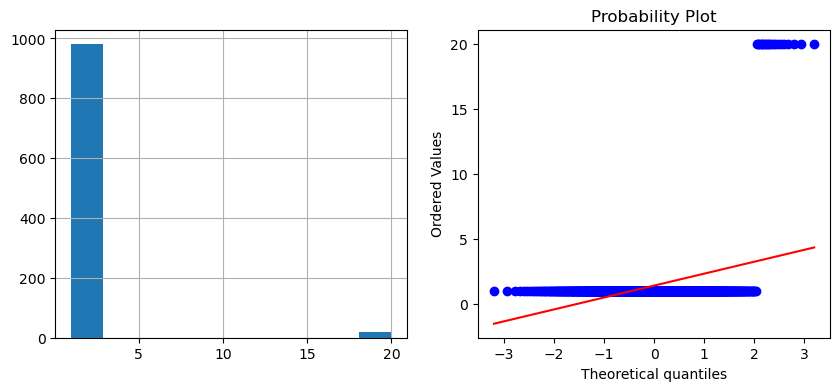

In [25]:
from scipy.stats import probplot
import pylab

def plot_data(df, feature):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    probplot(df[feature], dist='norm', plot=pylab)  # Corrected this line
    plt.show()

plot_data(df, 'No_of_Users_Per_IP_Address')

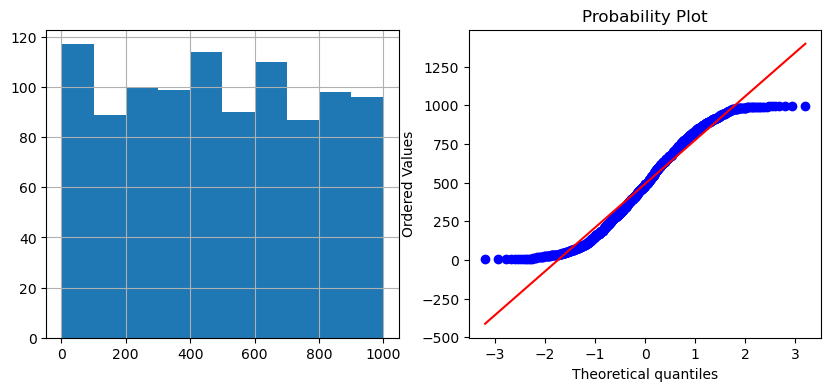

In [24]:
from scipy.stats import probplot
import pylab

def plot_data(df, feature):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    probplot(df[feature], dist='norm', plot=pylab)  # Corrected this line
    plt.show()

plot_data(df, 'Time_Spent_for_Registration')

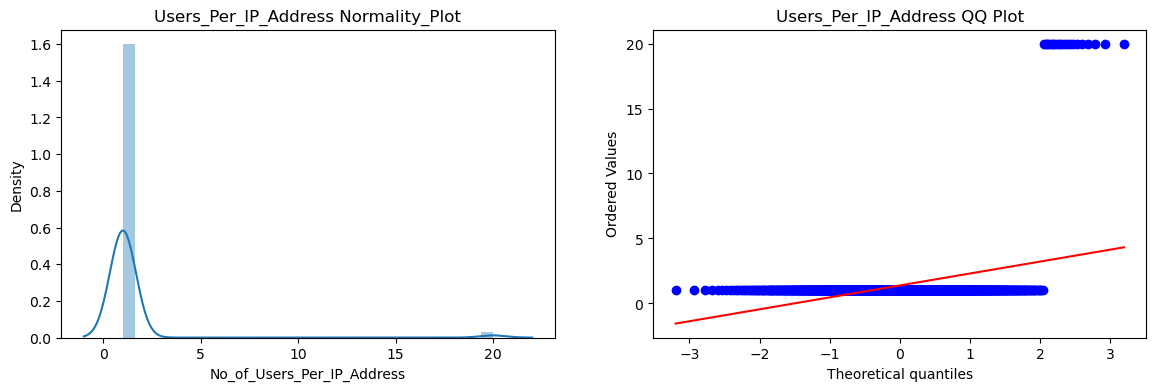

In [28]:
# Alternative Method ---

plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['No_of_Users_Per_IP_Address'])
plt.title('Users_Per_IP_Address Normality_Plot')

plt.subplot(122)
stats.probplot(df['No_of_Users_Per_IP_Address'], dist = "norm", plot = plt)
plt.title("Users_Per_IP_Address QQ Plot")

plt.show()

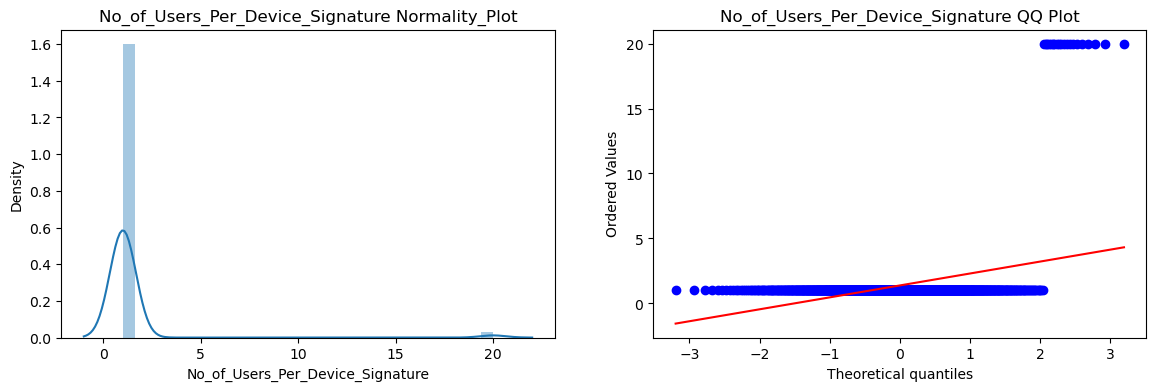

In [29]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['No_of_Users_Per_Device_Signature'])
plt.title('No_of_Users_Per_Device_Signature Normality_Plot')

plt.subplot(122)
stats.probplot(df['No_of_Users_Per_Device_Signature'], dist = "norm", plot = plt)
plt.title("No_of_Users_Per_Device_Signature QQ Plot")

plt.show()

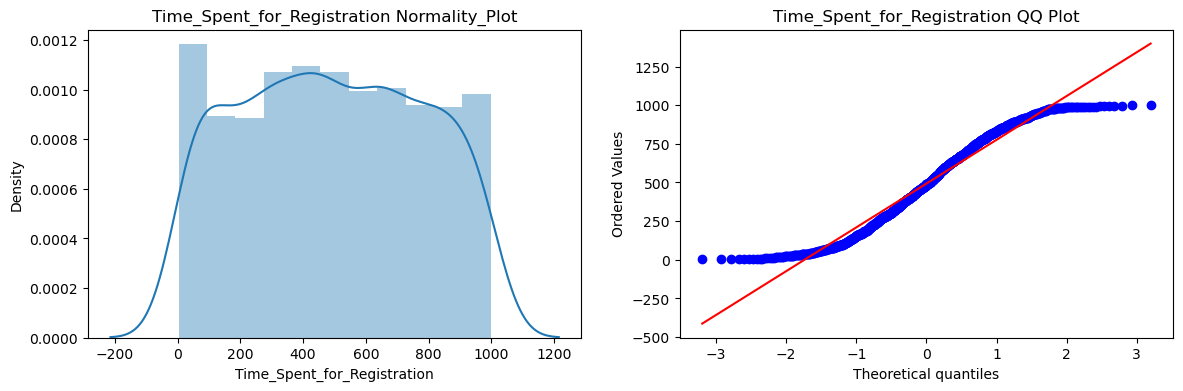

In [30]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Time_Spent_for_Registration'])
plt.title('Time_Spent_for_Registration Normality_Plot')

plt.subplot(122)
stats.probplot(df['Time_Spent_for_Registration'], dist = "norm", plot = plt)
plt.title("Time_Spent_for_Registration QQ Plot")

plt.show()

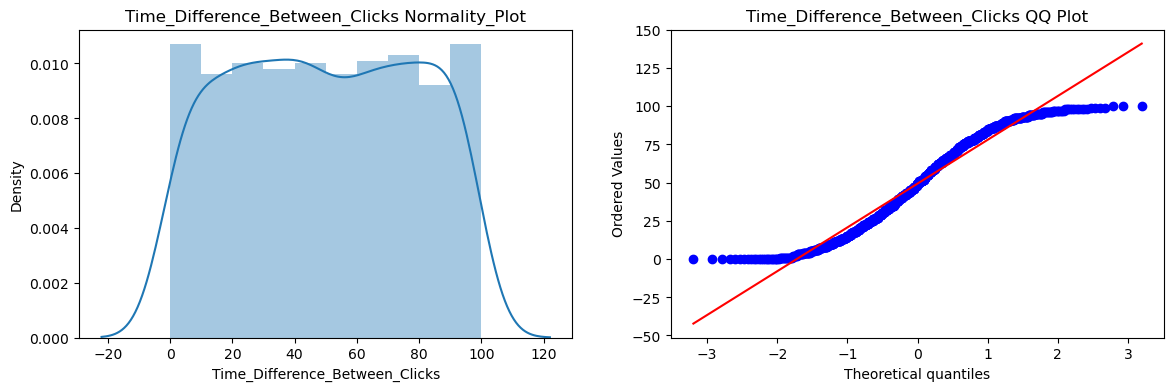

In [31]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Time_Difference_Between_Clicks'])
plt.title('Time_Difference_Between_Clicks Normality_Plot')

plt.subplot(122)
stats.probplot(df['Time_Difference_Between_Clicks'], dist = "norm", plot = plt)
plt.title("Time_Difference_Between_Clicks QQ Plot")

plt.show()

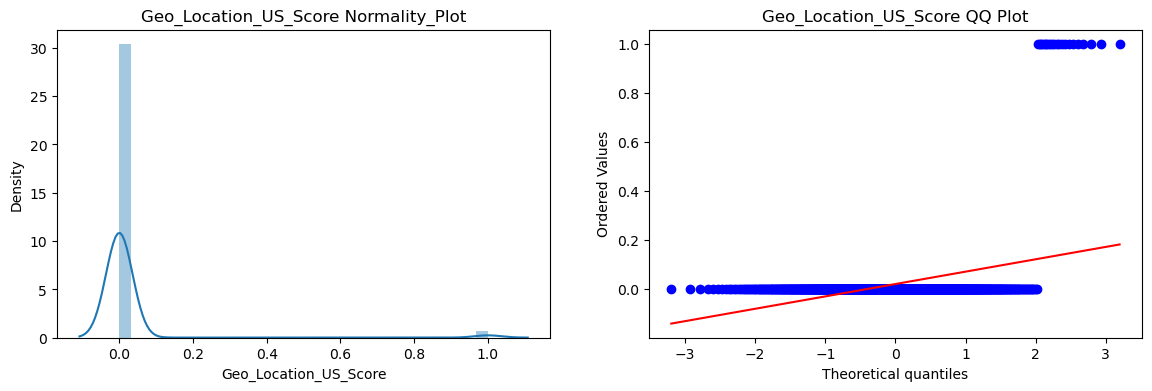

In [32]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Geo_Location_US_Score'])
plt.title('Geo_Location_US_Score Normality_Plot')

plt.subplot(122)
stats.probplot(df['Geo_Location_US_Score'], dist = "norm", plot = plt)
plt.title("Geo_Location_US_Score QQ Plot")

plt.show()

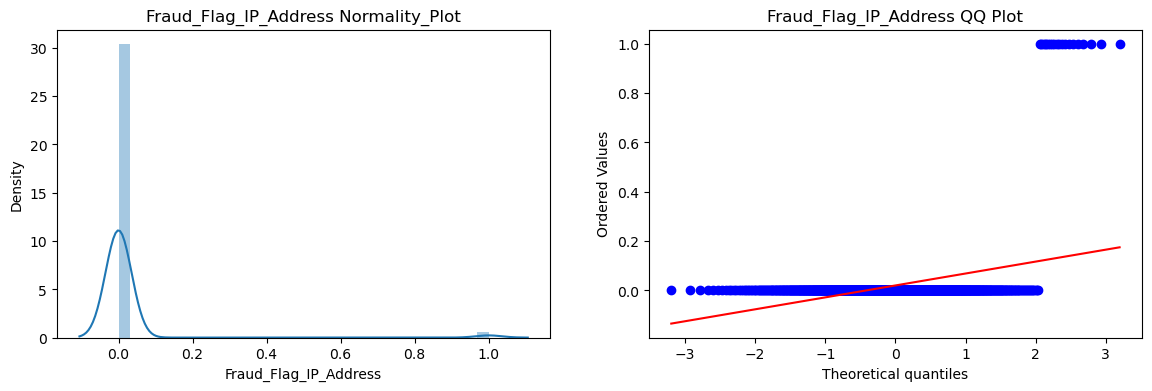

In [33]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Fraud_Flag_IP_Address'])
plt.title('Fraud_Flag_IP_Address Normality_Plot')

plt.subplot(122)
stats.probplot(df['Fraud_Flag_IP_Address'], dist = "norm", plot = plt)
plt.title("Fraud_Flag_IP_Address QQ Plot")

plt.show()

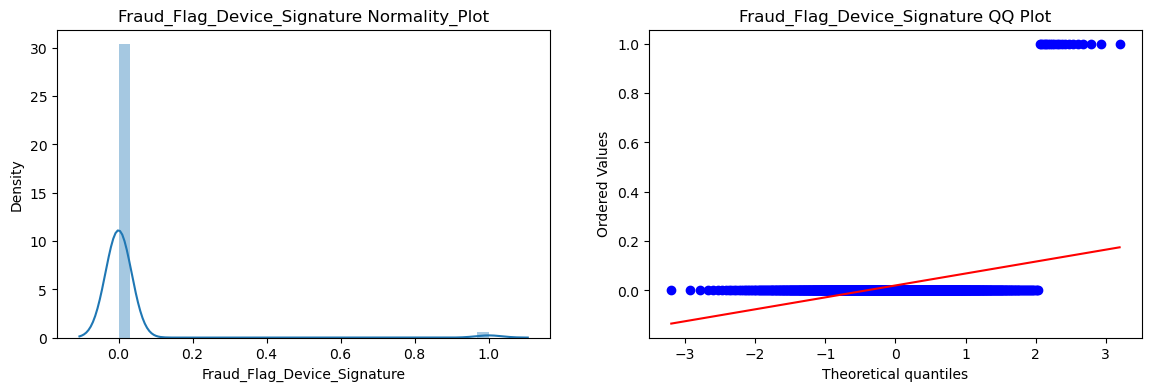

In [34]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Fraud_Flag_Device_Signature'])
plt.title('Fraud_Flag_Device_Signature Normality_Plot')

plt.subplot(122)
stats.probplot(df['Fraud_Flag_Device_Signature'], dist = "norm", plot = plt)
plt.title("Fraud_Flag_Device_Signature QQ Plot")

plt.show()

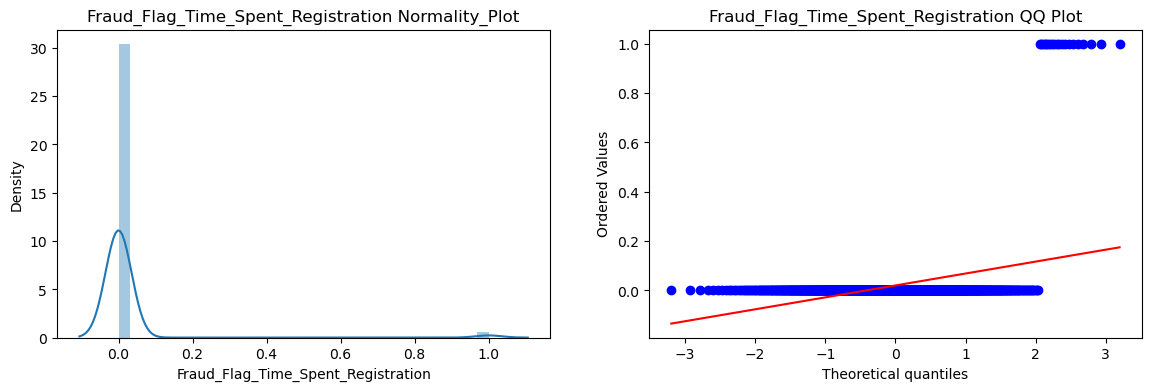

In [35]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Fraud_Flag_Time_Spent_Registration'])
plt.title('Fraud_Flag_Time_Spent_Registration Normality_Plot')

plt.subplot(122)
stats.probplot(df['Fraud_Flag_Time_Spent_Registration'], dist = "norm", plot = plt)
plt.title("Fraud_Flag_Time_Spent_Registration QQ Plot")

plt.show()

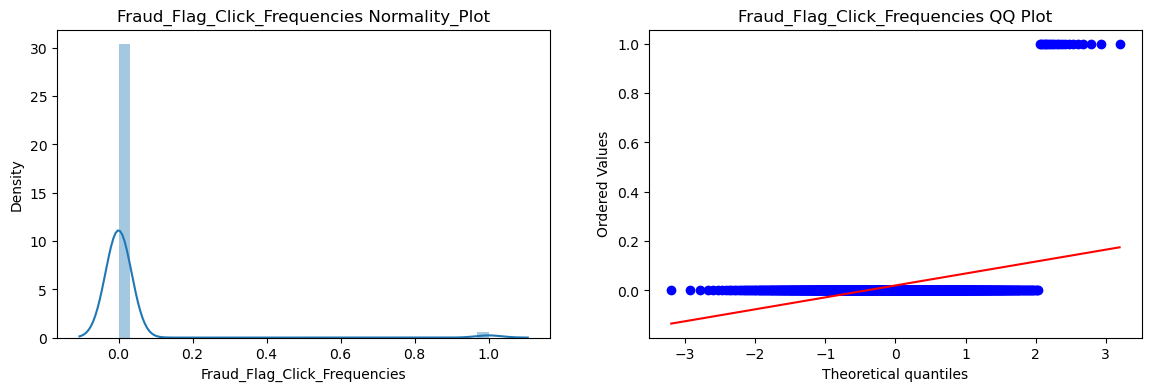

In [36]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Fraud_Flag_Click_Frequencies'])
plt.title('Fraud_Flag_Click_Frequencies Normality_Plot')

plt.subplot(122)
stats.probplot(df['Fraud_Flag_Click_Frequencies'], dist = "norm", plot = plt)
plt.title("Fraud_Flag_Click_Frequencies QQ Plot")

plt.show()

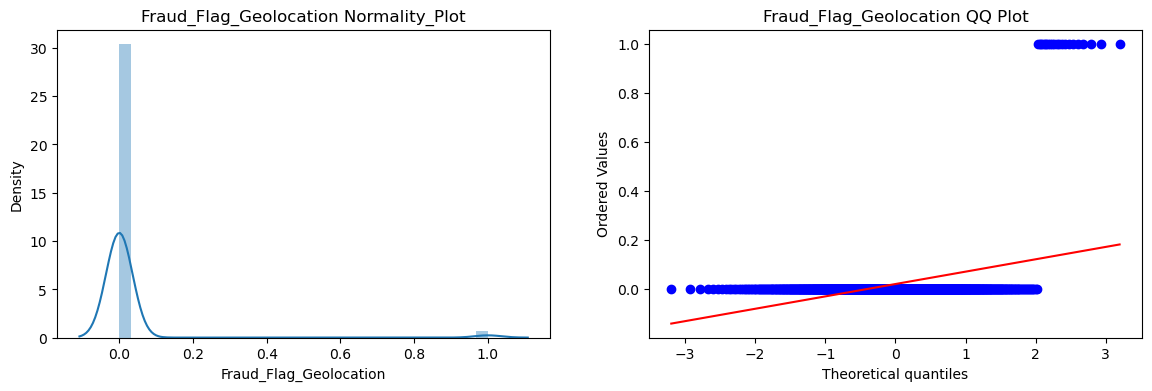

In [37]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Fraud_Flag_Geolocation'])
plt.title('Fraud_Flag_Geolocation Normality_Plot')

plt.subplot(122)
stats.probplot(df['Fraud_Flag_Geolocation'], dist = "norm", plot = plt)
plt.title("Fraud_Flag_Geolocation QQ Plot")

plt.show()

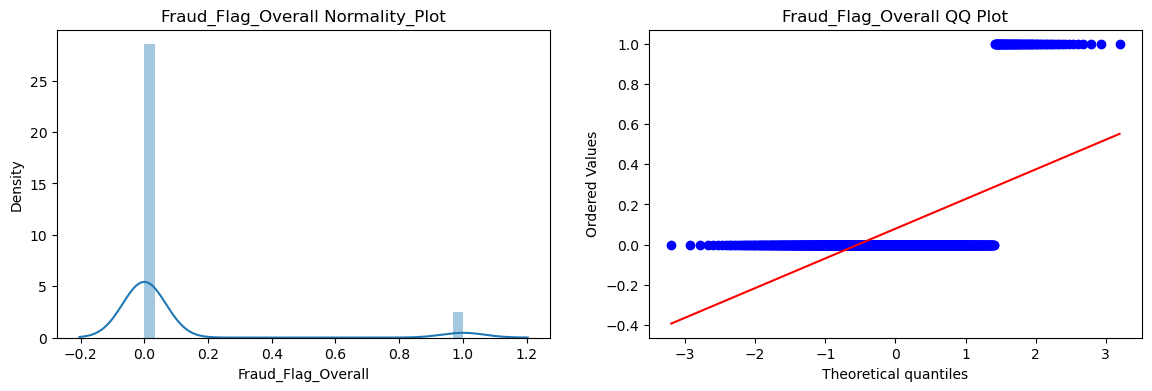

In [38]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Fraud_Flag_Overall'])
plt.title('Fraud_Flag_Overall Normality_Plot')

plt.subplot(122)
stats.probplot(df['Fraud_Flag_Overall'], dist = "norm", plot = plt)
plt.title("Fraud_Flag_Overall QQ Plot")

plt.show()

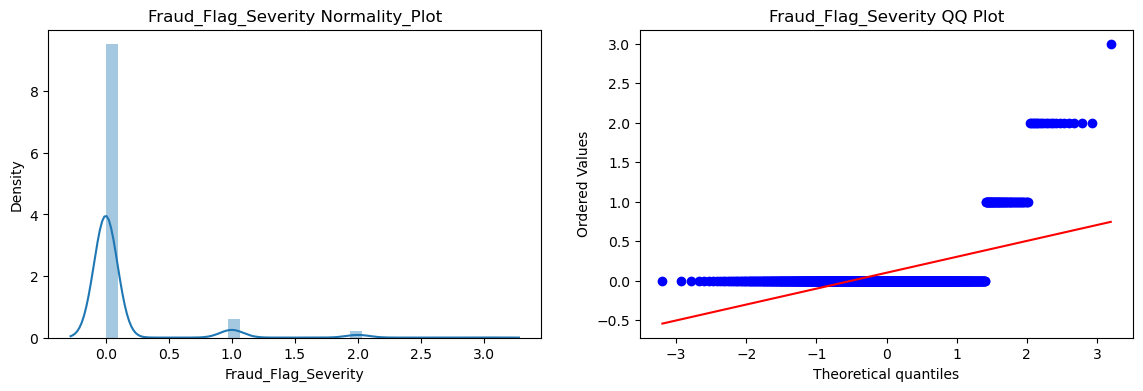

In [39]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Fraud_Flag_Severity'])
plt.title('Fraud_Flag_Severity Normality_Plot')

plt.subplot(122)
stats.probplot(df['Fraud_Flag_Severity'], dist = "norm", plot = plt)
plt.title("Fraud_Flag_Severity QQ Plot")

plt.show()

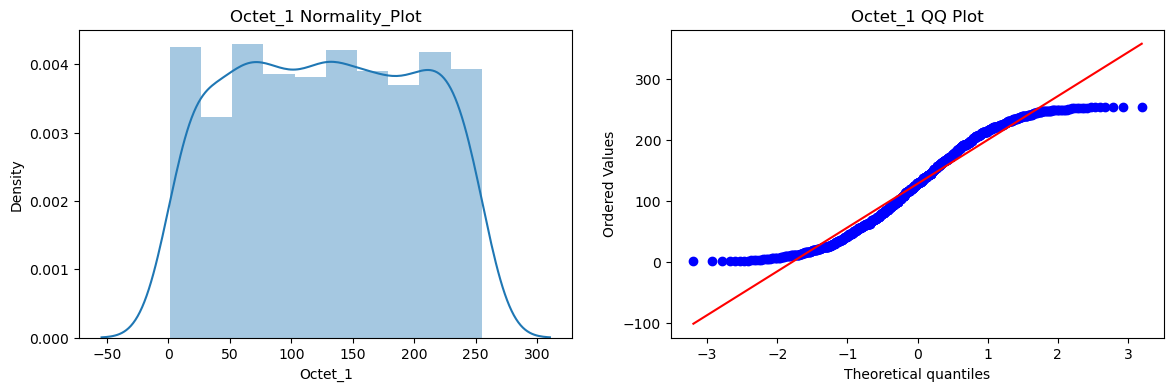

In [40]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Octet_1'])
plt.title('Octet_1 Normality_Plot')

plt.subplot(122)
stats.probplot(df['Octet_1'], dist = "norm", plot = plt)
plt.title("Octet_1 QQ Plot")

plt.show()

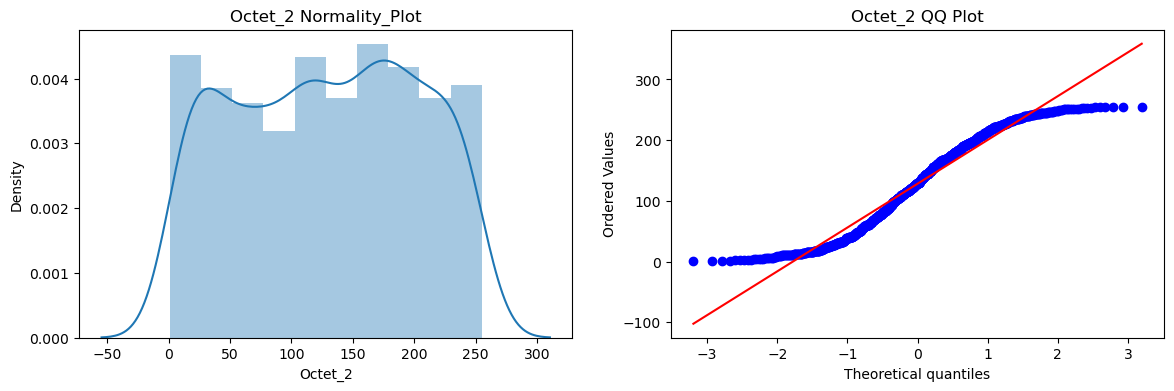

In [41]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Octet_2'])
plt.title('Octet_2 Normality_Plot')

plt.subplot(122)
stats.probplot(df['Octet_2'], dist = "norm", plot = plt)
plt.title("Octet_2 QQ Plot")

plt.show()

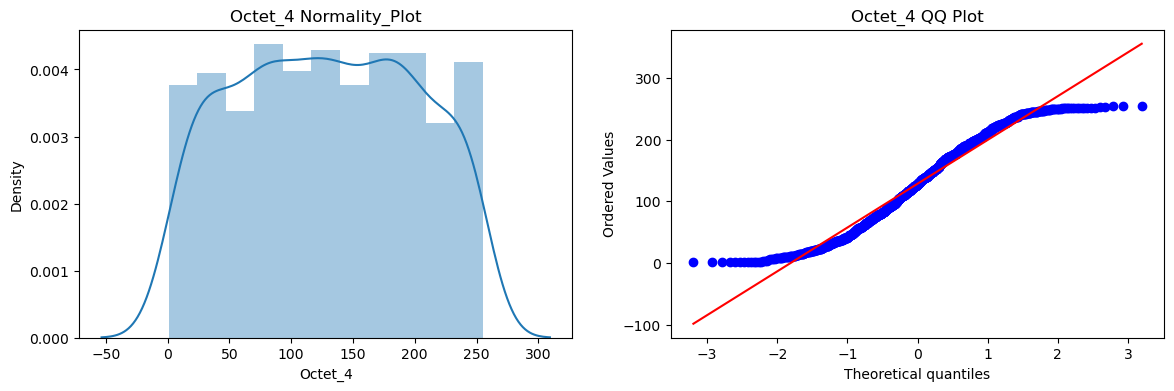

In [42]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(df['Octet_4'])
plt.title('Octet_4 Normality_Plot')

plt.subplot(122)
stats.probplot(df['Octet_4'], dist = "norm", plot = plt)
plt.title("Octet_4 QQ Plot")

plt.show()

# Encoding of Categorical Variables---

## One-Hot Encoding ---

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Event_Label'])], remainder='passthrough')
# X_encoded = ct.fit_transform(df)

# Get feature names
# feature_names = ct.named_transformers_['encoder'].get_feature_names_out(['Event_Label'])
# print(feature_names)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['Event_Label'])

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, one_hot_encoded], axis=1)

df.head()

Octet_1  Octet_2  Octet_3  Octet_4  User_ID   IP_Address  \
0      192      168        1        1        1  192.168.1.1   
1      192      168        1        1        2  192.168.1.1   
2      192      168        1        1        3  192.168.1.1   
3      192      168        1        1        4  192.168.1.1   
4      192      168        1        1        5  192.168.1.1   

   No_of_Users_Per_IP_Address Device_Signature  \
0                          20            abcd1   
1                          20            abcd2   
2                          20            abcd3   
3                          20            abcd4   
4                          20            abcd5   

   No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  ...  \
0                                 1                          997  ...   
1                                 1                          623  ...   
2                                 1                          459  ...   
3                                 1                          602  ...   
4                                 1                          552  ...   

   Fraud_Flag_Device_Signature  Fraud_Flag_Time_Spent_Registration  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   Fraud_Flag_Click_Frequencies  Fraud_Flag_Geolocation  Fraud_Flag_Overall  \
0                             0                       1                   1   
1                             0                       0                   1   
2                             0                       0                   1   
3                             0                       0                   1   
4                             0                       1                   1   

   Fraud_Flag_Severity                     Event_Label  Prospective_Risk  \
0                    2  Potentially_Illegitimate_Event         High Risk   
1                    1  Potentially_Illegitimate_Event     Moderate Risk   
2                    1  Potentially_Illegitimate_Event     Moderate Risk   
3                    1  Potentially_Illegitimate_Event     Moderate Risk   
4                    2  Potentially_Illegitimate_Event         High Risk   

   Legitimate_Event Potentially_Illegitimate_Event  
0                 0                              1  
1                 0                              1  
2                 0                              1  
3                 0                              1  
4                 0                              1  

[5 rows x 23 columns]

## Label Encoding ---

In [16]:
risk_type = {'Negligible Risk': 0, 'Moderate Risk': 1, 'High Risk': 2}
# Impute data using map function
df['Prospective_Risk'] = df['Prospective_Risk'].map(risk_type)
df

Octet_1  Octet_2  Octet_3  Octet_4  User_ID       IP_Address  \
0        192      168        1        1        1      192.168.1.1   
1        192      168        1        1        2      192.168.1.1   
2        192      168        1        1        3      192.168.1.1   
3        192      168        1        1        4      192.168.1.1   
4        192      168        1        1        5      192.168.1.1   
..       ...      ...      ...      ...      ...              ...   
995      194        6      251       77      996     194.6.251.77   
996      119      173      185      140      997  119.173.185.140   
997      109      137       98      211      998   109.137.98.211   
998       59       64      118       89      999     59.64.118.89   
999       40       71       49      240     1000     40.71.49.240   

     No_of_Users_Per_IP_Address Device_Signature  \
0                            20            abcd1   
1                            20            abcd2   
2                            20            abcd3   
3                            20            abcd4   
4                            20            abcd5   
..                          ...              ...   
995                           1          abcd976   
996                           1          abcd977   
997                           1          abcd978   
998                           1          abcd979   
999                           1          abcd980   

     No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  ...  \
0                                   1                          997  ...   
1                                   1                          623  ...   
2                                   1                          459  ...   
3                                   1                          602  ...   
4                                   1                          552  ...   
..                                ...                          ...  ...   
995                                 1                          229  ...   
996                                 1                          470  ...   
997                                 1                          393  ...   
998                                 1                          145  ...   
999                                 1                          743  ...   

     Fraud_Flag_Device_Signature  Fraud_Flag_Time_Spent_Registration  \
0                              0                                   0   
1                              0                                   0   
2                              0                                   0   
3                              0                                   0   
4                              0                                   0   
..                           ...                                 ...   
995                            0                                   0   
996                            0                                   0   
997                            0                                   0   
998                            0                                   0   
999                            0                                   0   

     Fraud_Flag_Click_Frequencies  Fraud_Flag_Geolocation  Fraud_Flag_Overall  \
0                               0                       1                   1   
1                               0                       0                   1   
2                               0                       0                   1   
3                               0                       0                   1   
4                               0                       1                   1   
..                            ...                     ...                 ...   
995                             0                       0                   0   
996                             0                       0                   0   
997                             0                       

In [18]:
# Convert uint8 column to int64

df['Legitimate_Event'] = df['Legitimate_Event'].astype('int64')
df['Potentially_Illegitimate_Event'] = df['Potentially_Illegitimate_Event'].astype('int64')

In [20]:
# Alternative Method  within a single code---
# Column Transformer ---
# Hereiin the Transformers are sent in the form of Tuples--
# Output is in the form of numpy array
# Website Ref---
# https://www.youtube.com/watch?v=5TVj6iEBR4I

#from sklearn.compose import ColumnTransformer
#transformer = ColumnTransformer(transformers = [
#    ('tnf1', SimpleImputer(),['var_name1']),
#    ('tnf2', OrdinalEncoder(categories = [['Category_1', 'Category_2']]),['var_name2']),
#    ('tnf3', OneHotEncoder(sparse = False, drop = 'col_index_number'), ['var_name_3', 'var_name_4'])
#], remainder = 'passtrhrough')

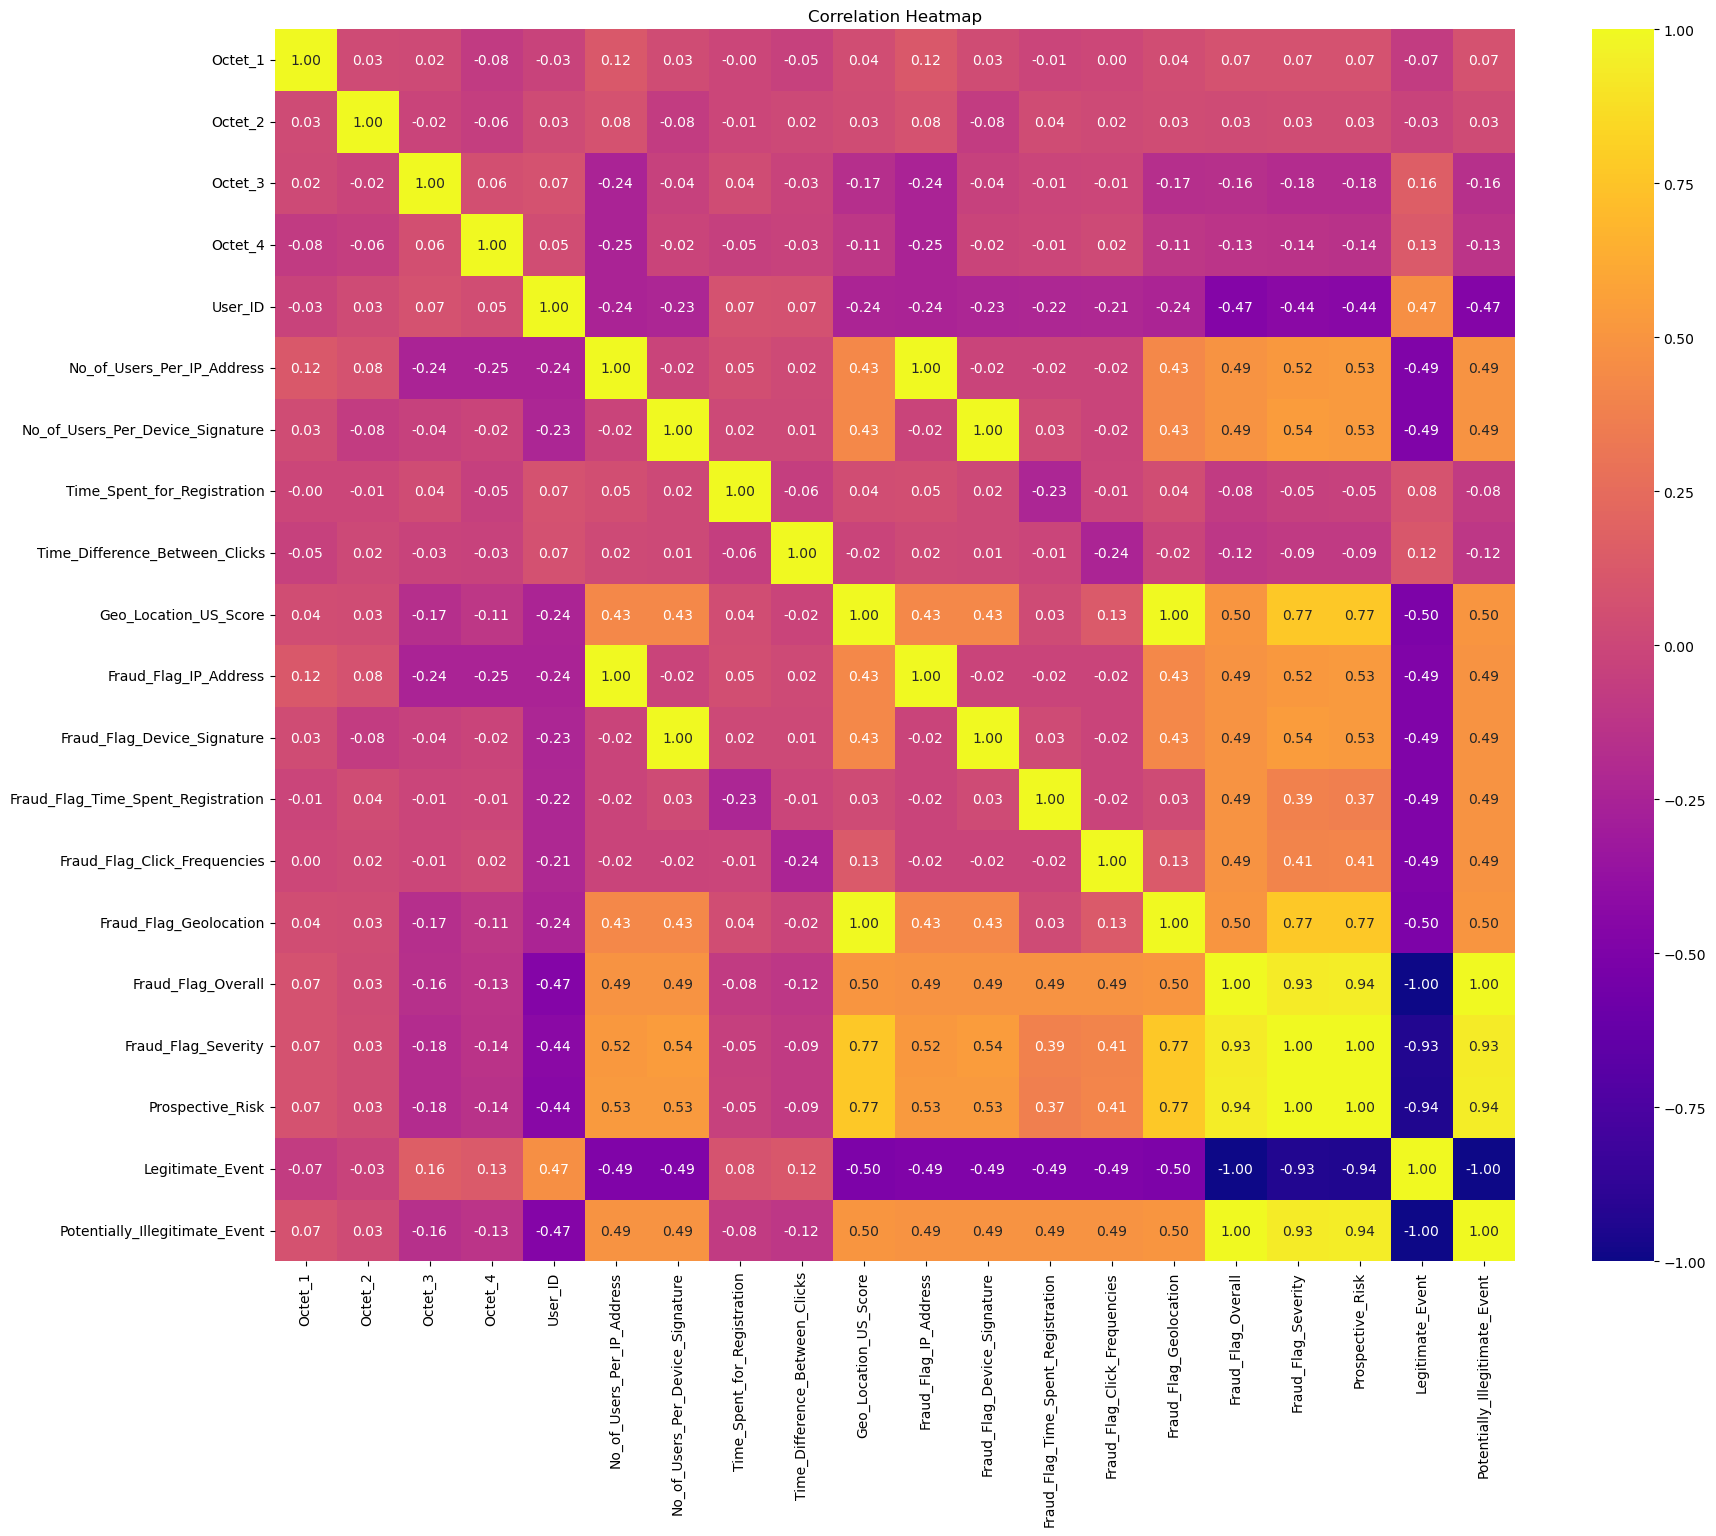

In [19]:
# Correlation Matrix / Correlogram ---

corr_matrix = df.corr()
# Create a mask to display only the upper triangle of the matrix
# mask = np.triu(np.ones(corr_matrix.shape), k=1)
# Set up the figure and axes
plt.figure(figsize=(20, 16))
# Create the heatmap using Seaborn
sns.heatmap(corr_matrix,cmap='plasma', annot=True, fmt=".2f",xticklabels='auto',yticklabels='auto')
plt.title("Correlation Heatmap")
plt.show()

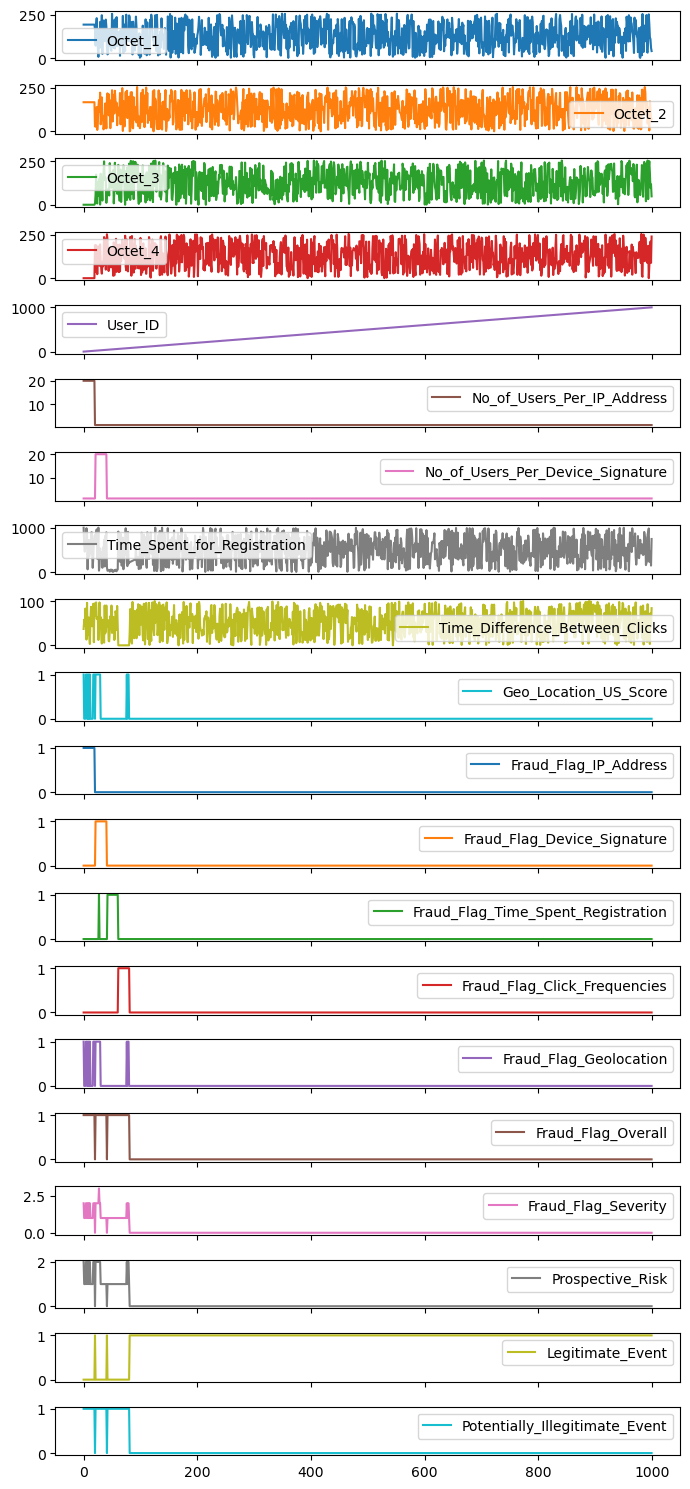

In [22]:
# Plotting multiple subplots for each column in the DataFrame with a specific figsize

df.plot(subplots=True, figsize=(7, 15))  # Adjust the figsize as needed
plt.tight_layout()
plt.show()

In [38]:
# Set the height of the pairplot---

# sns.pairplot(df, hue='Prospective_Risk', palette='bwr', height=10)

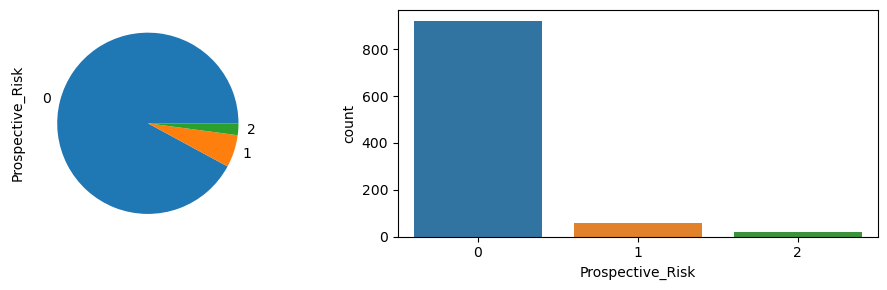

In [23]:
# cchart for distribution of target variable
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= df["Prospective_Risk"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df["Prospective_Risk"])
plt.tight_layout()
plt.show()

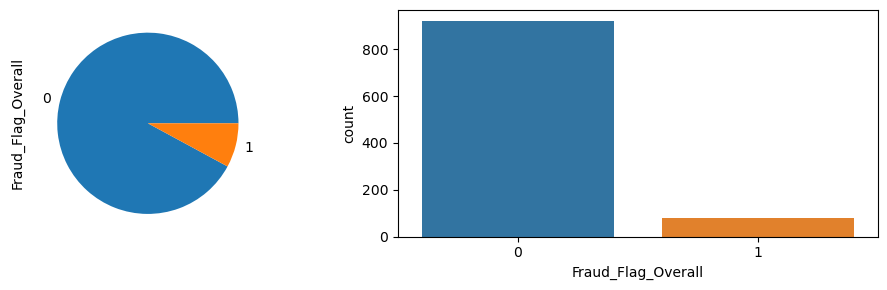

In [20]:
# cchart for distribution of target variable

fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= df["Fraud_Flag_Overall"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df["Fraud_Flag_Overall"])
plt.tight_layout()
plt.show()

# Dropping of Variables

In [21]:
# Dropping of following categorical variables from the dataframe ---

# List of columns to drop
columns_to_drop = ['User_ID','Device_Signature', 'Event_Label', 'IP_Address', 'Event_Label', 'Prospective_Risk',
                   'Legitimate_Event', 'Potentially_Illegitimate_Event']

# Drop specified columns
df = df.drop(columns=columns_to_drop, axis=1)

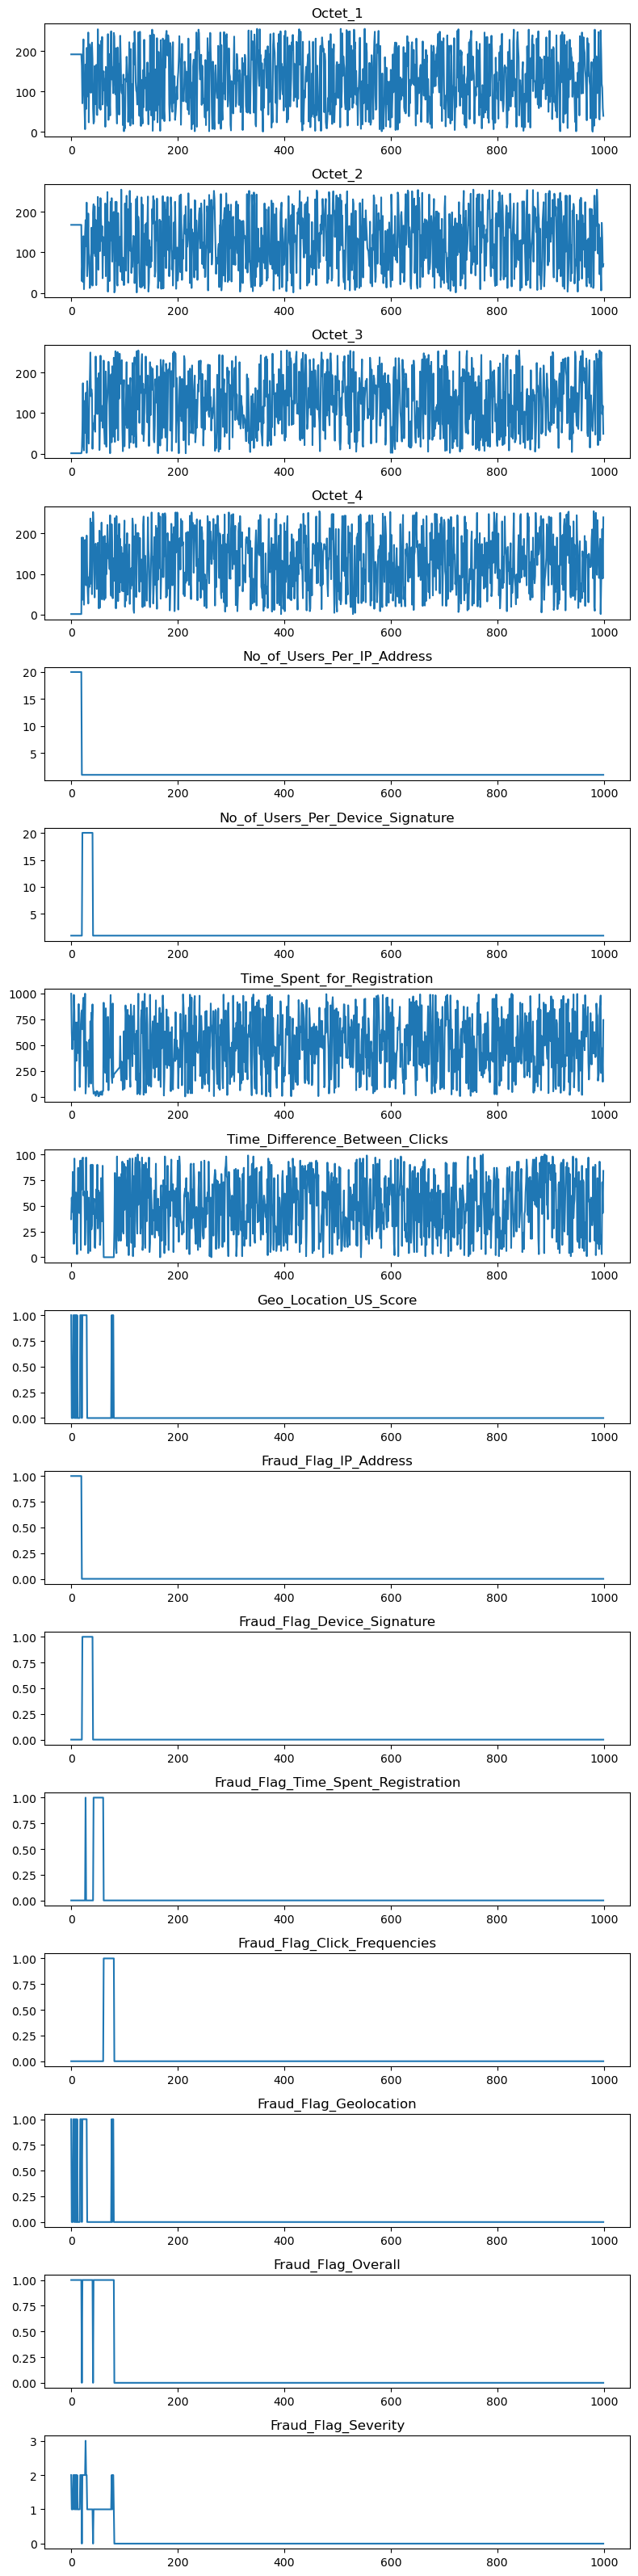

In [26]:
# Plotting multiple subplots for each column in the DataFrame
# NOTE: Only variables with Numeric values allowed

fig, axes = plt.subplots(len(df.columns), 1, figsize=(8, 2*len(df.columns)))  # Adjust figsize as needed

# Plotting each column in a separate subplot
for i, col in enumerate(df.columns):
    df[col].plot(ax=axes[i])
    axes[i].set_title(col)

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

# Train-Validation-Test Split

In [86]:
# Method 1 ---

from fast_ml.model_development import train_valid_test_split

# train, test, validation split
X_train, y_train, X_validation, y_validation, X_test, y_test = train_valid_test_split(df, 
                                                                            target = 'Prospective_Risk', 
                                                                            train_size=0.6, 
                                                                            valid_size=0.2, 
                                                                            test_size=0.2)

# reset index
for data in [X_train, y_train, X_valid, y_valid, X_test, y_test]:
    data.reset_index(drop=True, inplace=True)

In [87]:
# split dataset size---

print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)
print(X_test.shape, y_test.shape)  


(600, 18) (600,)
(200, 18) (200,)
(200, 18) (200,)


In [96]:
# OR ---
# Method 2 ---

ratio_train = 0.6
ratio_validation = 0.2
ratio_test = 0.2

# Produces test split.
X_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=ratio_test, random_state=42)  # Replace X, y with your actual data

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_validation_adjusted = ratio_validation / ratio_remaining

# Produces train and val splits.
X_train, X_validation, y_train, y_validation = train_test_split(
    X_remaining, y_remaining, test_size=ratio_validation_adjusted, random_state=42) 

In [97]:
# split dataset size
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)
print(X_test.shape, y_test.shape) 

(600, 18) (600, 1)
(200, 18) (200,)
(200, 18) (200, 1)


In [55]:
# OR ---
# Method 3 ---

features = ['Octet_1', 'Octet_2', 'Octet_3', 'Octet_4','No_of_Users_Per_IP_Address', 'No_of_Users_Per_Device_Signature',
            'Time_Spent_for_Registration', 'Time_Difference_Between_Clicks', 'Geo_Location_US_Score', 
            'Fraud_Flag_IP_Address', 'Fraud_Flag_Device_Signature', 'Fraud_Flag_Time_Spent_Registration', 
            'Fraud_Flag_Click_Frequencies', 'Fraud_Flag_Geolocation', 'Fraud_Flag_Severity']
X = df.loc[:, features]
y = df.loc[:, ['Prospective_Risk']]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, train_size = .60)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
    test_size= 0.20, random_state= 42) 

In [94]:
print("### DATASET - INDEPENDENT VARIABLES ###")
print(X_train.shape)
print("X_validation shape: {}".format(y_train.shape))
print(X_test.shape)
print("### DATASET - DEPENDENT VARIABLES ###")
print(y_train.shape)
print("y validation shape: {}".format(y_test.shape))
print(y_test.shape)

### DATASET - INDEPENDENT VARIABLES ###
(480, 18)
X_val shape: (480, 1)
(400, 18)
### DATASET - DEPENDENT VARIABLES ###
(480, 1)
y val shape: (400, 1)
(400, 1)


# Train - Test Split ---

In [22]:
features = ['Octet_1', 'Octet_2', 'Octet_3', 'Octet_4','No_of_Users_Per_IP_Address', 'No_of_Users_Per_Device_Signature',
            'Time_Spent_for_Registration', 'Time_Difference_Between_Clicks', 'Geo_Location_US_Score', 
            'Fraud_Flag_IP_Address', 'Fraud_Flag_Device_Signature', 'Fraud_Flag_Time_Spent_Registration', 
            'Fraud_Flag_Click_Frequencies', 'Fraud_Flag_Geolocation', 'Fraud_Flag_Severity']
X = df.loc[:, features]
y = df.loc[:, ['Fraud_Flag_Overall']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, train_size = .70)

In [24]:
print("### DATASET - INDEPENDENT VARIABLES ###")
print(X_train.shape)
print(X_test.shape)
print("### DATASET - DEPENDENT VARIABLES ###")
print(y_train.shape)
print(y_test.shape)

### DATASET - INDEPENDENT VARIABLES ###
(700, 15)
(300, 15)
### DATASET - DEPENDENT VARIABLES ###
(700, 1)
(300, 1)


# Feature Scaling on Selective Features/Variables ---

In [147]:
import pandas as pd


# Assuming df is your original DataFrame with the specified columns
col_names = ['Octet_1', 'Octet_2', 'Octet_3', 'Octet_4','No_of_Users_Per_IP_Address', 'No_of_Users_Per_Device_Signature', 
             'Time_Spent_for_Registration', 'Time_Difference_Between_Clicks', 'Geo_Location_US_Score', 
             'Fraud_Flag_IP_Address', 'Fraud_Flag_Device_Signature', 'Fraud_Flag_Time_Spent_Registration', 
             'Fraud_Flag_Click_Frequencies', 'Fraud_Flag_Geolocation', 'Fraud_Flag_Severity']

X_train = X_train[col_names]

# Specify the columns to be standardized
cols_to_standardize = ['Octet_1', 'Octet_2', 'Octet_3', 'Octet_4','No_of_Users_Per_IP_Address', 
                       'No_of_Users_Per_Device_Signature', 'Time_Spent_for_Registration',
                       'Time_Difference_Between_Clicks', 'Geo_Location_US_Score', 'Fraud_Flag_Severity']

# Create a ColumnTransformer
ct = ColumnTransformer([
        ('somename', StandardScaler(), cols_to_standardize)
    ], remainder='passthrough')

# Fit and transform the specified columns
features_transformed = ct.fit_transform(X_train)

# Convert the NumPy array back into a DataFrame
df_transformed = pd.DataFrame(features_transformed, columns=col_names)

# Display the DataFrame after converting back from NumPy array
df_transformed

Octet_1   Octet_2   Octet_3   Octet_4  No_of_Users_Per_IP_Address  \
0   -0.550807 -0.544554 -0.545778 -0.559765                   -0.672491   
1   -0.551423 -0.544273 -0.545389 -0.559757                   -0.672491   
2   -0.550902 -0.544768 -0.545426 -0.560299                   -0.672491   
3   -0.551471 -0.544493 -0.545237 -0.560351                   -0.672491   
4    2.797062  1.430071 -0.094485  0.396347                    1.388840   
..        ...       ...       ...       ...                         ...   
695 -0.550834 -0.544758 -0.545242 -0.559789                   -0.672491   
696 -0.550872 -0.544628 -0.545587 -0.560213                   -0.672491   
697  0.809032  2.107473 -0.011784  0.163404                    1.388840   
698 -0.551170 -0.544625 -0.545731 -0.560338                   -0.672491   
699 -0.551233 -0.544459 -0.545446 -0.560330                   -0.672491   

     No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  \
0                           -0.671604                    -0.548011   
1                           -0.671604                    -0.548041   
2                           -0.671604                    -0.548019   
3                           -0.671604                    -0.548049   
4                            1.345306                     0.453858   
..                                ...                          ...   
695                         -0.671604                    -0.548047   
696                         -0.671604                    -0.548029   
697                          1.345306                     2.426977   
698                         -0.671604                    -0.548047   
699                         -0.671604                    -0.548027   

     Time_Difference_Between_Clicks  Geo_Location_US_Score  \
0                         -0.559030              -0.171538   
1                         -0.556294              -0.171538   
2                         -0.556213              -0.171538   
3                         -0.557193              -0.171538   
4                         -0.398032               0.016090   
..                              ...                    ...   
695                       -0.558499              -0.171538   
696                       -0.556376              -0.171538   
697                        1.694629               0.016090   
698                       -0.556131              -0.171538   
699                       -0.557846              -0.171538   

     Fraud_Flag_IP_Address  Fraud_Flag_Device_Signature  \
0                -0.349785                          0.0   
1                -0.349785                          0.0   
2                -0.349785                          0.0   
3                -0.349785                          0.0   
4                 0.062370                          0.0   
..                     ...                          ...   
695              -0.349785                          0.0   
696              -0.349785                          0.0   
697               0.062370                          0.0   
698              -0.349785                          0.0   
699              -0.349785                          0.0   

     Fraud_Flag_Time_Spent_Registration  Fraud_Flag_Click_Frequencies  \
0                                   0.0                           0.0   
1                                   0.0                           0.0   
2                                   0.0                           0.0   
3                                   0.0                           0.0   
4                                   0.0                           0.0   
..                                  ...                           ...   
695                                 0.0                           0.0   
696                                 0.0                           0.0   
697                                 0.0                           0.0   
698                                 0.0                           0.0   
699    

In [25]:
# Alternative method ---

# a) Using StandardScaler on specific columns
cols_to_standardize = ['Octet_1', 'Octet_2', 'Octet_3', 'Octet_4','No_of_Users_Per_IP_Address', 
                       'No_of_Users_Per_Device_Signature', 'Time_Spent_for_Registration', 'Time_Difference_Between_Clicks', 
                       'Geo_Location_US_Score', 'Fraud_Flag_Severity']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit on the specified columns and transform
X_train[cols_to_standardize] = scaler.fit_transform(X_train[cols_to_standardize])

# Display the DataFrame after standardization
print("DataFrame after StandardScaler:")
print(X_train)

# b) Converting NumPy array back into the existing DataFrame
# Assuming cols_to_standardize contains the columns that were standardized

# Create a new DataFrame with the standardized values
df_standardized = pd.DataFrame(scaler.transform(X_train[cols_to_standardize]), columns=cols_to_standardize)

# Update the original DataFrame with the standardized values
df.update(df_standardized)

# Display the DataFrame after converting back from NumPy array
print("\nDataFrame after converting back from NumPy array:")
X_train

DataFrame after StandardScaler:
      Octet_1   Octet_2   Octet_3   Octet_4  No_of_Users_Per_IP_Address  \
541  0.398108 -1.581689  0.785888  0.971824                   -0.142857   
440  0.107950 -0.424998  1.563692 -0.668094                   -0.142857   
482 -0.624352  0.839293 -0.286944 -1.177985                   -0.142857   
422 -0.444731 -0.169450  1.483229 -0.654314                   -0.142857   
778  1.448202  0.193698 -1.306135 -0.861026                   -0.142857   
..        ...       ...       ...       ...                         ...   
106 -0.099305  1.041041 -0.313765 -1.122862                   -0.142857   
270  0.218487  0.543395 -1.627985 -1.494944                   -0.142857   
860 -0.486182  0.866193 -1.225673 -1.095300                   -0.142857   
435  1.296215  0.516495  1.617333 -1.246889                   -0.142857   
102  0.038865 -0.922644 -0.756309  0.572180                   -0.142857   

     No_of_Users_Per_Device_Signature  Time_Spent_for_Registration 

Octet_1   Octet_2   Octet_3   Octet_4  No_of_Users_Per_IP_Address  \
541  0.398108 -1.581689  0.785888  0.971824                   -0.142857   
440  0.107950 -0.424998  1.563692 -0.668094                   -0.142857   
482 -0.624352  0.839293 -0.286944 -1.177985                   -0.142857   
422 -0.444731 -0.169450  1.483229 -0.654314                   -0.142857   
778  1.448202  0.193698 -1.306135 -0.861026                   -0.142857   
..        ...       ...       ...       ...                         ...   
106 -0.099305  1.041041 -0.313765 -1.122862                   -0.142857   
270  0.218487  0.543395 -1.627985 -1.494944                   -0.142857   
860 -0.486182  0.866193 -1.225673 -1.095300                   -0.142857   
435  1.296215  0.516495  1.617333 -1.246889                   -0.142857   
102  0.038865 -0.922644 -0.756309  0.572180                   -0.142857   

     No_of_Users_Per_Device_Signature  Time_Spent_for_Registration  \
541                          -0.13756                    -1.370300   
440                          -0.13756                     0.216612   
482                          -0.13756                     0.464240   
422                          -0.13756                    -1.195914   
778                          -0.13756                    -0.739023   
..                                ...                          ...   
106                          -0.13756                     1.248977   
270                          -0.13756                     0.471216   
860                          -0.13756                     1.140857   
435                          -0.13756                     1.419875   
102                          -0.13756                     1.395461   

     Time_Difference_Between_Clicks  Geo_Location_US_Score  \
541                       -0.507120               -0.13756   
440                        0.188518               -0.13756   
482                        0.223300               -0.13756   
422                       -1.237541               -0.13756   
778                       -1.620142               -0.13756   
..                              ...                    ...   
106                        1.545013               -0.13756   
270                        1.231976               -0.13756   
860                        0.536337               -0.13756   
435                       -0.437557               -0.13756   
102                        1.336322               -0.13756   

     Fraud_Flag_IP_Address  Fraud_Flag_Device_Signature  \
541                      0                            0   
440                      0                            0   
482                      0                            0   
422                      0                            0   
778                      0                            0   
..                     ...                          ...   
106                      0                            0   
270                      0                            0   
860                      0                            0   
435                      0                            0   
102                      0                            0   

     Fraud_Flag_Time_Spent_Registration  Fraud_Flag_Click_Frequencies  \
541                                   0                             0   
440                                   0                             0   
482                                   0                             0   
422                                   0                             0   
778                                   0                             0   
..                                  ...                           ...   
106                                   0                             0   
270                                   0                             0   
860                                   0                             0   
435                                   0                             0   
102    

In [27]:
clf=LogisticRegression()
# clf2=DecisionTreeClassifier()
# fit(clf.fit(X_train, y_train)), predict y_pred=clf.fit(X_test) = (X_test), print("Accuracy Alogo Name", accuracy_score(y_test,y_pred))

# ML Algorithm ---

## Logistic Regression ---

### Model I

#### Herein, the Regularization parameter has a default value of 1.0 

In [24]:
clf = LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model

LogisticRegression(random_state=0, solver='liblinear')

In [25]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [27]:
model.intercept_

array([-3.96121125])

In [28]:
model.coef_

array([[ 3.32833966e-02,  2.52533072e-02, -2.76234975e-02,
        -3.39788610e-02,  6.00518127e-01,  5.78758616e-01,
        -1.04517021e-01, -1.15100452e-01,  5.44194293e-01,
         4.84831272e-03,  4.57034221e-03,  3.51433485e-01,
         2.88540883e-01, -9.60373304e-05,  2.85308667e+00]])

In [29]:
model.predict_proba(X_train)

array([[0.992033  , 0.007967  ],
       [0.99341652, 0.00658348],
       [0.99310795, 0.00689205],
       ...,
       [0.99362401, 0.00637599],
       [0.99323212, 0.00676788],
       [0.99485633, 0.00514367]])

In [227]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], d

In [30]:
model.score(X_test, y_test)

0.9133333333333333

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test data
prediction = logreg.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, prediction))
print('F1 score:', f1_score(y_test, prediction))
print('Recall:', recall_score(y_test, prediction))
print('Precision:', precision_score(y_test, prediction))
print('\nClassification report:\n', classification_report(y_test, prediction))
print('\nConfusion matrix:\n', confusion_matrix(y_test, prediction))

Accuracy: 0.9133333333333333
F1 score: 0.13333333333333333
Recall: 0.07142857142857142
Precision: 1.0

Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300


Confusion matrix:
 [[272   0]
 [ 26   2]]


In [32]:
# Confusion Matrix ---

confusion_matrix(y_test, model.predict(X_test))

array([[272,   0],
       [ 26,   2]], dtype=int64)

In [34]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [ 26,   2]], dtype=int64)

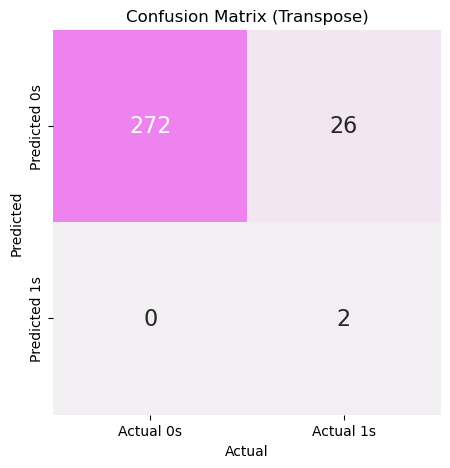

In [35]:
# Define color scheme
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("violet", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

In [36]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300



In [37]:
# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Extract coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Apply exponential function to obtain odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display results
weights_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# Add intercept to the DataFrame
weights_df.loc[len(weights_df.index)] = ['Intercept', intercept, np.exp(intercept)]

weights_df
# Display the DataFrame

Variable  Coefficient  Odds Ratio
0                              Octet_1     0.091306    1.095604
1                              Octet_2     0.053885    1.055363
2                              Octet_3    -0.043074    0.957841
3                              Octet_4    -0.031126    0.969354
4           No_of_Users_Per_IP_Address     0.400277    1.492238
5     No_of_Users_Per_Device_Signature     0.381050    1.463820
6          Time_Spent_for_Registration    -0.305984    0.736398
7       Time_Difference_Between_Clicks    -0.349354    0.705144
8                Geo_Location_US_Score     0.000181    1.000181
9                Fraud_Flag_IP_Address     0.056036    1.057636
10         Fraud_Flag_Device_Signature     0.051442    1.052788
11  Fraud_Flag_Time_Spent_Registration     0.538277    1.713053
12        Fraud_Flag_Click_Frequencies     0.445875    1.561856
13              Fraud_Flag_Geolocation     0.000022    1.000022
14                 Fraud_Flag_Severity     3.062175   21.373998
15                           Intercept    -5.562041    0.003841

In [42]:
# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Extract coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Check if the number of features matches the number of coefficients
if len(X_train.columns) != len(coefficients):
    raise ValueError("Number of features does not match the number of coefficients.")

# Apply exponential function to obtain odds ratios
odds_ratios = np.exp(coefficients)

# Predict probabilities for the training data
probabilities_train = logreg.predict_proba(X_train)[:, 1]

# Create a DataFrame to display results
weights_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'Probability': probabilities_train
})

# Add intercept to the DataFrame
weights_df.loc[len(weights_df.index)] = ['Intercept', intercept, np.exp(intercept), np.nan]

# Display the DataFrame
print(weights_df)

ValueError: All arrays must be of the same length

In [44]:
# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Extract coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Check if the number of features matches the number of coefficients
if len(X_train.columns) != len(coefficients):
    raise ValueError("Number of features does not match the number of coefficients.")

# Apply exponential function to obtain odds ratios
odds_ratios = np.exp(coefficients)

# Predict probabilities for the training data
probabilities_train = logreg.predict_proba(X_train)[:, 1]

# Create a DataFrame to display results
weights_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
        
})

# Add intercept to the DataFrame
weights_df.loc[len(weights_df.index)] = ['Intercept', intercept, np.exp(intercept)]

# Display the DataFrame
print(weights_df)

                              Variable  Coefficient  Odds Ratio
0                              Octet_1     0.091306    1.095604
1                              Octet_2     0.053885    1.055363
2                              Octet_3    -0.043074    0.957841
3                              Octet_4    -0.031126    0.969354
4           No_of_Users_Per_IP_Address     0.400277    1.492238
5     No_of_Users_Per_Device_Signature     0.381050    1.463820
6          Time_Spent_for_Registration    -0.305984    0.736398
7       Time_Difference_Between_Clicks    -0.349354    0.705144
8                Geo_Location_US_Score     0.000181    1.000181
9                Fraud_Flag_IP_Address     0.056036    1.057636
10         Fraud_Flag_Device_Signature     0.051442    1.052788
11  Fraud_Flag_Time_Spent_Registration     0.538277    1.713053
12        Fraud_Flag_Click_Frequencies     0.445875    1.561856
13              Fraud_Flag_Geolocation     0.000022    1.000022
14                 Fraud_Flag_Severity  

##  Model II - Logistic Regression 

### Herein, we use with the regularization strength C equal to 10.0

In [38]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [42]:
model.intercept_

array([-5.50463853])

In [43]:
model.coef_

array([[ 3.45405252e-02,  2.76729559e-02, -2.73459189e-02,
        -3.40662738e-02,  8.01175348e-01,  7.71538947e-01,
        -1.16593637e-01, -1.30280400e-01,  7.57148245e-01,
         2.07177810e-03,  1.93313026e-03,  5.28369758e-01,
         4.43020688e-01, -9.69606884e-06,  4.16979827e+00]])

In [44]:
model.predict_proba(X_train)

array([[9.98858493e-01, 1.14150729e-03],
       [9.99082860e-01, 9.17140424e-04],
       [9.99041389e-01, 9.58611417e-04],
       ...,
       [9.99124961e-01, 8.75038639e-04],
       [9.99058141e-01, 9.41859387e-04],
       [9.99308034e-01, 6.91966014e-04]])

In [45]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], d

In [46]:
model.score(X_test, y_test)

0.9133333333333333

In [47]:
confusion_matrix(y_test, model.predict(X_test))

array([[272,   0],
       [ 26,   2]], dtype=int64)

In [48]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [ 26,   2]], dtype=int64)

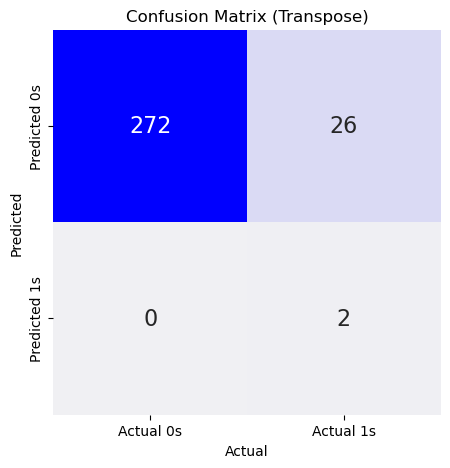

In [49]:
# Define color scheme
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("blue", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300



## Model 3 ---

In [39]:
# import library

from sklearn.linear_model import LogisticRegression

# Make instance of model with default parameters except class weight as we will add class weights due to class imbalance problem

# creates an instance of the Logistic Regression model (lr_basemodel). The class_weight parameter is set to {0: 0.3, 1: 0.95}. 
# This parameter is used to assign different weights to different classes in order to address class imbalance. 
# In this case, class 0 is assigned a weight of 0.1, and class 1 is assigned a weight of 0.9.

lr_basemodel = LogisticRegression(class_weight={0:0.3,1:0.95})

# train model to learn relationships between input and output variables
#  trains the logistic regression model (lr_basemodel) i.e. (X_train as features and y_train as target labels). 
# The model learns the relationships between the input features and the output labels during the training process.


# In summary, these codes import the Logistic Regression algorithm.
# Thereafter an instance of LR Algorithm with specified class weights to handle class imbalance is created.
# The model is trained on the provided training data.

lr_basemodel.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.3, 1: 0.95})

In [52]:
model.intercept_

array([-5.50463853])

In [53]:
model.coef_

array([[ 3.45405252e-02,  2.76729559e-02, -2.73459189e-02,
        -3.40662738e-02,  8.01175348e-01,  7.71538947e-01,
        -1.16593637e-01, -1.30280400e-01,  7.57148245e-01,
         2.07177810e-03,  1.93313026e-03,  5.28369758e-01,
         4.43020688e-01, -9.69606884e-06,  4.16979827e+00]])

In [54]:
model.predict_proba(X_train)

array([[9.98858493e-01, 1.14150729e-03],
       [9.99082860e-01, 9.17140424e-04],
       [9.99041389e-01, 9.58611417e-04],
       ...,
       [9.99124961e-01, 8.75038639e-04],
       [9.99058141e-01, 9.41859387e-04],
       [9.99308034e-01, 6.91966014e-04]])

In [55]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], d

In [56]:
model.score(X_test, y_test)

0.9133333333333333

In [57]:
confusion_matrix(y_test, model.predict(X_test))

array([[272,   0],
       [ 26,   2]], dtype=int64)

In [58]:
# Predictions on the test set
y_predict = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [ 26,   2]], dtype=int64)

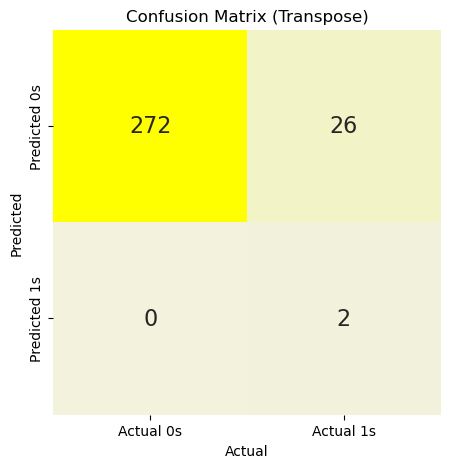

In [59]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("yellow", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

In [60]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300



In [309]:
# Initialize the Multinomial Logistic Regression model

# multi_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_log_reg = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)

# Fit the model on the training data
multi_log_reg.fit(X_train, y_train)

# Make predictions on the test set
predictions = multi_log_reg.predict(X_test)

# Evaluate the model
accuracy = multi_log_reg.score(X_test, y_test)
print(f"Accuracy of Logistic Regression: {accuracy}")

Accuracy of Logistic Regression: 0.9133333333333333


In [310]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300



## Model 4 - Using Statsmodel library ---

In [45]:
model = sm.Logit(y_train, X_train)
model

In [81]:
import statsmodels.api as sm
import statsmodels.tools as tools

# add constant to training data
X_train_const = tools.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train_const).fit_regularized(method='l1', alpha=0.1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.002438459880078164
            Iterations: 236
            Function evaluations: 262
            Gradient evaluations: 236


In [47]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:     Fraud_Flag_Overall   No. Observations:                  700
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.9992
Time:                        12:34:41   Log-Likelihood:               -0.15275
converged:                       True   LL-Null:                       -182.68
Covariance Type:            nonrobust   LLR p-value:                 2.240e-81
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -7.0752      2.616     -2.705      0.007     -12.201      -1.949
Octet_1                                     0        nan   

In [48]:
# add constant to test data
X_test_const = tools.add_constant(X_test)

# Predict responses 
pred = log_reg.predict(X_test_const)
prediction = pred.round()

# Accuracy score
accuracy = accuracy_score(y_test, prediction)
print('\nTest accuracy = ', accuracy)


Test accuracy =  0.9333333333333333


In [49]:
# Confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[272   0]
 [ 20   8]]


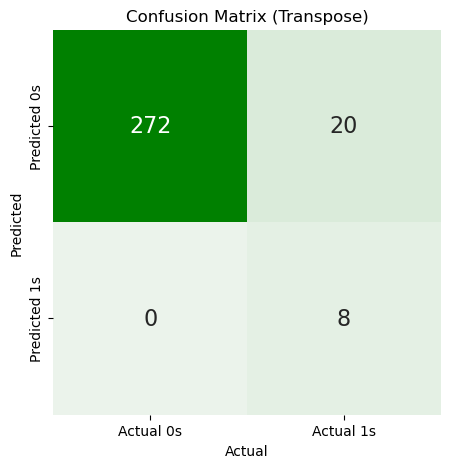

In [316]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, prediction)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("green", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

In [50]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       272
           1       1.00      0.29      0.44        28

    accuracy                           0.93       300
   macro avg       0.97      0.64      0.70       300
weighted avg       0.94      0.93      0.92       300



# Model 5 - Logistic Regression with pipeline ---

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


# Define the pipeline
model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance (for classification)
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9133333333333333
F1 score: 0.13333333333333333
Recall: 0.07142857142857142
Precision: 1.0

Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300



# Model 6

In [54]:
log_reg = LogisticRegression(penalty=None, solver = 'newton-cg', max_iter= 150).fit(X_train,y_train)
log_reg

LogisticRegression(max_iter=150, penalty=None, solver='newton-cg')

In [55]:
print("\nModel Intercept: ",log_reg.intercept_)


Model Intercept:  [-12.91298304]


In [56]:
print("Model Coefficients: ", log_reg.coef_)

Model Coefficients:  [[ 2.54628584e-02  1.93278219e-02 -4.11041801e-02 -3.85393309e-02
   1.40559459e+00  1.72786600e+00 -1.12360452e-01 -1.23007552e-01
   1.32856076e+00 -6.14764188e-02 -6.54083792e-03  1.38303863e+00
   1.18135582e+00 -6.04493081e-02  1.01963436e+01]]


In [57]:
# Predict responses
pred = log_reg.predict(X_test)
rounded_predictions = np.round(pred)

# Accuracy score
accuracy = accuracy_score(y_test, rounded_predictions)
print('\nTest accuracy = ', accuracy)


Test accuracy =  0.9133333333333333


In [58]:
# Confusion matrix
cm = confusion_matrix(y_test, rounded_predictions) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[272   0]
 [ 26   2]]


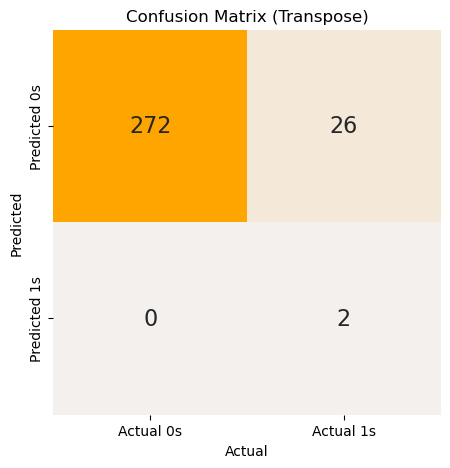

In [59]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, rounded_predictions)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("orange", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

In [59]:
print(classification_report(y_test,rounded_predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300



# Lasso Regression ---

In [101]:
from sklearn.linear_model import Lasso

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are your training and testing data
# Assuming 'lasso_model' is your Lasso model

# Train Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_prediction = lasso_model.predict(X_test)
lasso_prediction = [1 if x >= 0.5 else 0 for x in lasso_prediction]

# Print evaluation metrics for Lasso Regression
print('Accuracy:', accuracy_score(y_test, lasso_prediction))
print('F1 score:', f1_score(y_test, lasso_prediction))
print('Recall:', recall_score(y_test, lasso_prediction))
print('Precision:', precision_score(y_test, lasso_prediction))
print('\nClassification report:\n', classification_report(y_test, lasso_prediction))
print('\nConfusion matrix:\n', confusion_matrix(y_test, lasso_prediction))

Accuracy: 0.9066666666666666
F1 score: 0.0
Recall: 0.0
Precision: 0.0

Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300


Confusion matrix:
 [[272   0]
 [ 28   0]]


In [102]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[272   0]
 [ 20   8]]


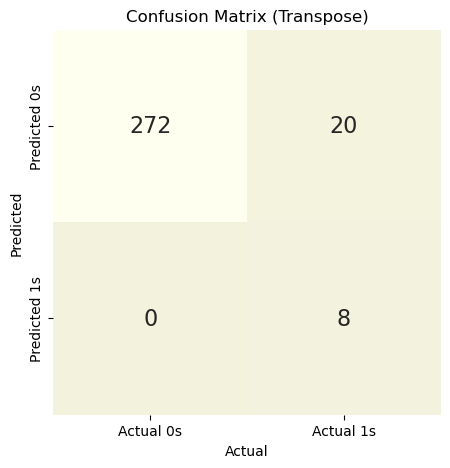

In [99]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("ivory", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

# Ridge Regression ---

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
import pandas as pd

# Create sample data
#X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)


# Create a RidgeClassifier model
ridge_model = RidgeClassifier(alpha=1.0, random_state=42)  # Adjust alpha as needed

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
accuracy = ridge_model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Display the coefficients and intercept if needed
# Note: RidgeClassifier doesn't have coef_ or intercept_ attributes like RidgeRegression


Accuracy: 0.9533333333333334


In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[272   0]
 [ 14  14]]


In [45]:
# Access the coefficients (weights) of the features
coefficients = ridge_model.coef_
coefficients

array([[-1.18707753e-03, -2.61199087e-03, -1.44552327e-03,
        -1.04703735e-04,  3.40282882e-02,  1.42824790e-02,
         9.05706286e-04,  1.10242480e-03, -2.55736332e-01,
         4.76396035e-03,  1.92821562e-03,  6.51504801e-02,
         1.91722957e-01, -3.45258546e-02,  6.42468810e-01]])

In [46]:
model.predict_proba(X_train)

array([[9.98858493e-01, 1.14150729e-03],
       [9.99082860e-01, 9.17140424e-04],
       [9.99041389e-01, 9.58611417e-04],
       ...,
       [9.99124961e-01, 8.75038639e-04],
       [9.99058141e-01, 9.41859387e-04],
       [9.99308034e-01, 6.91966014e-04]])

In [47]:
from sklearn.linear_model import RidgeClassifier


# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are your training and testing data
# Assuming 'ridge_model' is your RidgeClassifier model

# Train logistic regression model for odds ratio calculation
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Calculate odds ratios using logistic regression coefficients
logreg_odds_ratios = np.exp(logreg.coef_[0])

# Extract coefficients and intercept from RidgeClassifier
ridge_coefficients = ridge_model.coef_[0]
ridge_intercept = ridge_model.intercept_[0]

# Calculate odds ratios using RidgeClassifier coefficients
ridge_odds_ratios = np.exp(ridge_coefficients)

# Create a DataFrame to display results
odds_ratio_df = pd.DataFrame({
    'Variable': X_train.columns,
    'LogReg_Coefficient': logreg.coef_[0],
    'LogReg_Odds_Ratio': logreg_odds_ratios,
    'Ridge_Coefficient': ridge_coefficients,
    'Ridge_Odds_Ratio': ridge_odds_ratios,
})

# Add intercept values to the DataFrame
odds_ratio_df.loc[len(odds_ratio_df.index)] = ['Intercept', logreg.intercept_[0], np.exp(logreg.intercept_[0]),
                                               ridge_intercept, np.exp(ridge_intercept)]

# Display the DataFrame
odds_ratio_df

Variable  LogReg_Coefficient  LogReg_Odds_Ratio  \
0                              Octet_1            0.091306           1.095604   
1                              Octet_2            0.053885           1.055363   
2                              Octet_3           -0.043074           0.957841   
3                              Octet_4           -0.031126           0.969354   
4           No_of_Users_Per_IP_Address            0.400277           1.492238   
5     No_of_Users_Per_Device_Signature            0.381050           1.463820   
6          Time_Spent_for_Registration           -0.305984           0.736398   
7       Time_Difference_Between_Clicks           -0.349354           0.705144   
8                Geo_Location_US_Score            0.000181           1.000181   
9                Fraud_Flag_IP_Address            0.056036           1.057636   
10         Fraud_Flag_Device_Signature            0.051442           1.052788   
11  Fraud_Flag_Time_Spent_Registration            0.538277           1.713053   
12        Fraud_Flag_Click_Frequencies            0.445875           1.561856   
13              Fraud_Flag_Geolocation            0.000022           1.000022   
14                 Fraud_Flag_Severity            3.062175          21.373998   
15                           Intercept           -5.562041           0.003841   

    Ridge_Coefficient  Ridge_Odds_Ratio  
0           -0.001187          0.998814  
1           -0.002612          0.997391  
2           -0.001446          0.998556  
3           -0.000105          0.999895  
4            0.034028          1.034614  
5            0.014282          1.014385  
6            0.000906          1.000906  
7            0.001102          1.001103  
8           -0.255736          0.774346  
9            0.004764          1.004775  
10           0.001928          1.001930  
11           0.065150          1.067320  
12           0.191723          1.211335  
13          -0.034526          0.966063  
14           0.642469          1.901169  
15          -0.858091          0.423970

In [48]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are your training and testing data
# Assuming 'ridge_model' is your RidgeClassifier model

# Make predictions on the test set
ridge_prediction = ridge_model.predict(X_test)

# Print evaluation metrics for Ridge Regression
print('Accuracy:', accuracy_score(y_test, ridge_prediction))
print('F1 score:', f1_score(y_test, ridge_prediction))
print('Recall:', recall_score(y_test, ridge_prediction))
print('Precision:', precision_score(y_test, ridge_prediction))
print('\nClassification report:\n', classification_report(y_test, ridge_prediction))
print('\nConfusion matrix:\n', confusion_matrix(y_test, ridge_prediction))

Accuracy: 0.9533333333333334
F1 score: 0.6666666666666666
Recall: 0.5
Precision: 1.0

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       272
           1       1.00      0.50      0.67        28

    accuracy                           0.95       300
   macro avg       0.98      0.75      0.82       300
weighted avg       0.96      0.95      0.95       300


Confusion matrix:
 [[272   0]
 [ 14  14]]


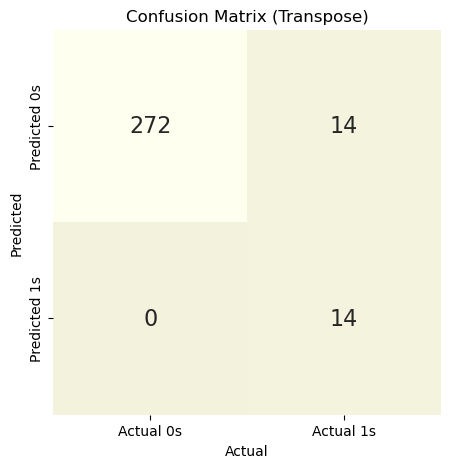

In [111]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("ivory", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       272
           1       1.00      0.50      0.67        28

    accuracy                           0.95       300
   macro avg       0.98      0.75      0.82       300
weighted avg       0.96      0.95      0.95       300



# Elastic-Net ---

In [112]:
# Create Logistic Regression model with ElasticNet penalty
elasticnet_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)

# Fit the model on the training data
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elasticnet_model.predict(X_test)

# Evaluate the model (you can use other classification metrics as needed)
accuracy = elasticnet_model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Display the coefficients and intercept
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': elasticnet_model.coef_[0]})
intercept = elasticnet_model.intercept_[0]
print(coefficients)
print(f'Intercept: {intercept}')

Accuracy: 0.91
                               Feature  Coefficient
0                              Octet_1     0.000000
1                              Octet_2     0.000000
2                              Octet_3     0.000000
3                              Octet_4     0.000000
4           No_of_Users_Per_IP_Address     0.333500
5     No_of_Users_Per_Device_Signature     0.293994
6          Time_Spent_for_Registration    -0.055686
7       Time_Difference_Between_Clicks    -0.078656
8                Geo_Location_US_Score     0.115099
9                Fraud_Flag_IP_Address     0.000000
10         Fraud_Flag_Device_Signature     0.000000
11  Fraud_Flag_Time_Spent_Registration     0.097858
12        Fraud_Flag_Click_Frequencies     0.004494
13              Fraud_Flag_Geolocation     0.000000
14                 Fraud_Flag_Severity     3.333494
Intercept: -5.1615476583781685


In [113]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[272   0]
 [ 27   1]]


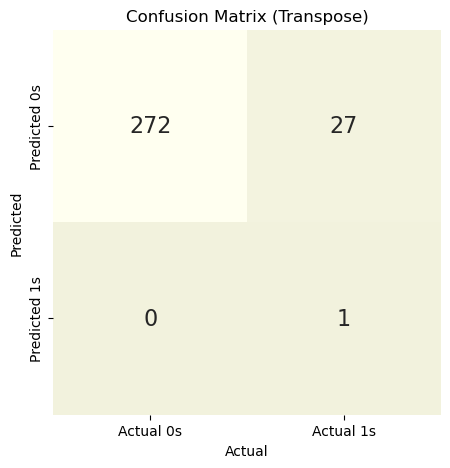

In [134]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("ivory", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

# Model - Using Weighted Coefficients for Logistic Regression---

In [181]:
# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Extract coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Assuming you have weights for each variable in a dictionary 'variable_weights'
variable_weights = {'Octet_1': 0.5, 'Octet_2': 0.3, 'Octet_3': 0.2, 'Octet_4': 0.2, 'No_of_Users_Per_IP_Address': 0.2,
                    'No_of_Users_Per_Device_Signature': 0.5, 'Time_Spent_for_Registration': 0.5, 
                    'Time_Difference_Between_Clicks': 0.5, 'Geo_Location_US_Score': 0.5, 'Fraud_Flag_IP_Address': 0.5, 
                    'Fraud_Flag_Device_Signature': 0.5, 'Fraud_Flag_Time_Spent_Registration': 0.5, 
                    'Fraud_Flag_Click_Frequencies': 0.5, 'Fraud_Flag_Geolocation': 0.5, 'Fraud_Flag_Severity': 0.5}

# Calculate the weighted coefficients
weighted_coefficients = coefficients * np.array([variable_weights.get(col, 1.0) for col in X_train.columns])

# Apply exponential function to obtain odds ratios
odds_ratios = np.exp(weighted_coefficients)

# Predict probabilities for the training data
probabilities_train = logreg.predict_proba(X_train)[:, 1]

# Create a DataFrame to display results
weights_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients,
    'Weights': np.array([variable_weights.get(col, 1.0) for col in X_train.columns]),
    'Weighted_Coefficient': weighted_coefficients,
    'Odds_Ratio': odds_ratios,
   #'Probability': probabilities_train
})

# Add intercept to the DataFrame
#weights_df.loc[len(weights_df.index)] = ['Intercept', intercept, np.nan, np.nan, np.exp(intercept), np.nan]
#weights_df.loc[len(weights_df.index)] = ['Intercept', intercept, np.exp(intercept), np.nan]

# Display the DataFrame
weights_df


Variable  Coefficient  Weights  \
0                              Octet_1     0.091306      0.5   
1                              Octet_2     0.053885      0.3   
2                              Octet_3    -0.043074      0.2   
3                              Octet_4    -0.031126      0.2   
4           No_of_Users_Per_IP_Address     0.400277      0.2   
5     No_of_Users_Per_Device_Signature     0.381050      0.5   
6          Time_Spent_for_Registration    -0.305984      0.5   
7       Time_Difference_Between_Clicks    -0.349354      0.5   
8                Geo_Location_US_Score     0.000181      0.5   
9                Fraud_Flag_IP_Address     0.056036      0.5   
10         Fraud_Flag_Device_Signature     0.051442      0.5   
11  Fraud_Flag_Time_Spent_Registration     0.538277      0.5   
12        Fraud_Flag_Click_Frequencies     0.445875      0.5   
13              Fraud_Flag_Geolocation     0.000022      0.5   
14                 Fraud_Flag_Severity     3.062175      0.5   

    Weighted_Coefficient  Odds_Ratio  
0               0.045653    1.046711  
1               0.016165    1.016297  
2              -0.008615    0.991422  
3              -0.006225    0.993794  
4               0.080055    1.083347  
5               0.190525    1.209884  
6              -0.152992    0.858137  
7              -0.174677    0.839728  
8               0.000090    1.000090  
9               0.028018    1.028414  
10              0.025721    1.026054  
11              0.269139    1.308836  
12              0.222938    1.249743  
13              0.000011    1.000011  
14              1.531088    4.623202

In [129]:
# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Extract coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Apply exponential function to obtain odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display results
weights_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

weights_df
# Display the DataFrame

Variable  Coefficient  Odds Ratio
0                              Octet_1     0.091306    1.095604
1                              Octet_2     0.053885    1.055363
2                              Octet_3    -0.043074    0.957841
3                              Octet_4    -0.031126    0.969354
4           No_of_Users_Per_IP_Address     0.400277    1.492238
5     No_of_Users_Per_Device_Signature     0.381050    1.463820
6          Time_Spent_for_Registration    -0.305984    0.736398
7       Time_Difference_Between_Clicks    -0.349354    0.705144
8                Geo_Location_US_Score     0.000181    1.000181
9                Fraud_Flag_IP_Address     0.056036    1.057636
10         Fraud_Flag_Device_Signature     0.051442    1.052788
11  Fraud_Flag_Time_Spent_Registration     0.538277    1.713053
12        Fraud_Flag_Click_Frequencies     0.445875    1.561856
13              Fraud_Flag_Geolocation     0.000022    1.000022
14                 Fraud_Flag_Severity     3.062175   21.373998

In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Apply weights to the test data
X_test_weighted = X_test.copy()
for col in X_test_weighted.columns:
    X_test_weighted[col] *= variable_weights.get(col, 1.0)

# Predict responses
y_pred = model.predict(X_test_weighted)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate and display accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
[[272   0]
 [ 27   1]]

Accuracy: 0.91
F1 score: 0.0689655172413793
Recall: 0.03571428571428571
Precision: 1.0

Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.04      0.07        28

    accuracy                           0.91       300
   macro avg       0.95      0.52      0.51       300
weighted avg       0.92      0.91      0.87       300



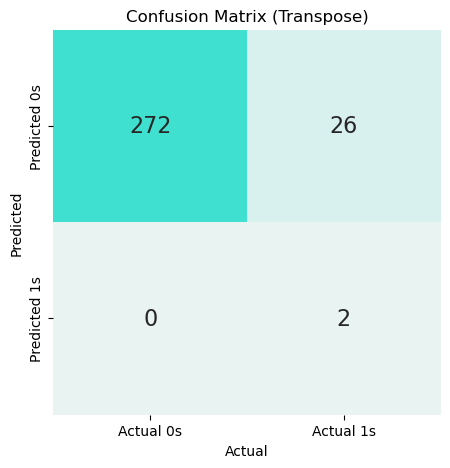

In [77]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("turquoise", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

In [183]:
# Alternate Method ---for weighted coefficients

from sklearn.linear_model import LogisticRegression

# Assign weights to variables
variable_weights = {
    'Octet_1': 0.90,
    'Octet_2': 0.70,
    'Octet_3': 0.90,
    'Octet_4': 1.00,
    'No_of_Users_Per_IP_Address': 1.0,
    'No_of_Users_Per_Device_Signature': 0.90,
    'Time_Spent_for_Registration': 0.75,
    'Time_Difference_Between_Clicks': 0.80,
    'Geo_Location_US_Score': 0.90,
    'Fraud_Flag_IP_Address': 1.0,
    'Fraud_Flag_Device_Signature': 1.0,
    'Fraud_Flag_Time_Spent_Registration': 1.0,
    'Fraud_Flag_Click_Frequencies': 1.0,
    'Fraud_Flag_Geolocation': 1.0,
    'Fraud_Flag_Severity': 1.0,
}

# Apply weights to the training data
X_train_weighted = X_train.copy()
for col in X_train_weighted.columns:
    X_train_weighted[col] *= variable_weights.get(col, 1.0)

# Create Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on the training data with weights applied
lr_model.fit(X_train_weighted, y_train)

# Intercept value
intercept_value = lr_model.intercept_[0]

# Display the coefficients and intercept
coefficients = lr_model.coef_[0]
for variable, weight in zip(X_train_weighted.columns, coefficients):
    print(f"{variable}: {weight}")

print(f"Intercept: {intercept_value}")

Octet_1: 0.09104979558435351
Octet_2: 0.057892692896458535
Octet_3: -0.04125548823994618
Octet_4: -0.031809142222793976
No_of_Users_Per_IP_Address: 0.38446464847821155
No_of_Users_Per_Device_Signature: 0.383242041853865
Time_Spent_for_Registration: -0.30789459457028207
Time_Difference_Between_Clicks: -0.34620311576882956
Geo_Location_US_Score: 0.00017967858061539667
Fraud_Flag_IP_Address: 0.053812129783090926
Fraud_Flag_Device_Signature: 0.0574767221234235
Fraud_Flag_Time_Spent_Registration: 0.543915179089074
Fraud_Flag_Click_Frequencies: 0.44355888078734657
Fraud_Flag_Geolocation: 1.4954843819190458e-05
Fraud_Flag_Severity: 3.0822991403906435
Intercept: -5.5221553198422475


In [184]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Apply weights to the test data
X_test_weighted = X_test.copy()
for col in X_test_weighted.columns:
    X_test_weighted[col] *= variable_weights.get(col, 1.0)

# Predict responses
y_pred = lr_model.predict(X_test_weighted)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate and display accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

Confusion Matrix:
[[272   0]
 [ 26   2]]

Accuracy: 0.9133333333333333


In [185]:
# OR ---

from sklearn.metrics import confusion_matrix

# Predict responses on the test data
X_test_weighted = X_test.copy()
for col in X_test_weighted.columns:
    X_test_weighted[col] *= variable_weights.get(col, 1.0)

# Predict responses 
y_pred = lr_model.predict(X_test_weighted)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[272   0]
 [ 26   2]]


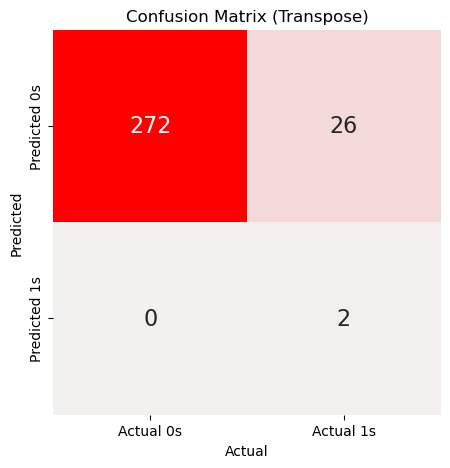

In [320]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("red", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

In [321]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300



# Statsmodel package ---

In [49]:
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame with dependent variable 'y_train' and independent variables in 'x_train'
# Adjust the formula based on your variable names
formula = "Fraud_Flag_Overall ~ No_of_Users_Per_IP_Address + No_of_Users_Per_Device_Signature + Time_Spent_for_Registration + Time_Difference_Between_Clicks + Geo_Location_US_Score + Fraud_Flag_Severity" # Update with your actual variable names

# Fit logistic regression model using maximum likelihood
logit_model = smf.logit(formula, data=df)
result = logit_model.fit()

# Display the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.246189
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:     Fraud_Flag_Overall   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.1090
Time:                        20:28:16   Log-Likelihood:                -246.19
converged:                       True   LL-Null:                       -276.32
Covariance Type:            nonrobust   LLR p-value:                 3.982e-11
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.4195      3.355     -0.7

In [50]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'df' is your DataFrame with dependent variable 'y_train' and independent variables in 'x_train'
# Adjust the formula based on your variable names
formula = "Fraud_Flag_Overall ~ No_of_Users_Per_IP_Address + No_of_Users_Per_Device_Signature + Time_Spent_for_Registration + Time_Difference_Between_Clicks + Geo_Location_US_Score + Fraud_Flag_Severity"  # Update with your actual variable names

# Fit logistic regression model using maximum likelihood
logit_model = smf.logit(formula, data=df)
result = logit_model.fit()

# Predict probabilities
y_prob = result.predict(df)

# Convert probabilities to binary predictions
y_pred = (y_prob > 0.5).astype(int)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': df['Fraud_Flag_Overall'], 'Predicted': y_pred})

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(results_df['Actual'], results_df['Predicted'])
precision = precision_score(results_df['Actual'], results_df['Predicted'])
recall = recall_score(results_df['Actual'], results_df['Predicted'])
f1 = f1_score(results_df['Actual'], results_df['Predicted'])

# Display metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Optimization terminated successfully.
         Current function value: 0.246189
         Iterations 22
Accuracy: 0.921
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [51]:
# Same code within 1 frame ---

import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
# Adjust the formula based on your variable names
formula = "Fraud_Flag_Overall ~ No_of_Users_Per_IP_Address + No_of_Users_Per_Device_Signature + Time_Spent_for_Registration + Time_Difference_Between_Clicks + Geo_Location_US_Score + Fraud_Flag_Severity"  # Update with your actual variable names

# Fit logistic regression model using maximum likelihood
logit_model = smf.logit(formula, data=df)
result = logit_model.fit()

# Display the summary
print(result.summary())

# Assuming 'X_test' is your test set without the dependent variable
# Add constant to the test data
X_test_const = sm.add_constant(X_test)

# Predict responses using the fitted model
y_pred_prob = result.predict(X_test_const)

# Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
predictions = (y_pred_prob > 0.5).astype(int)

# Assuming 'y_test' is your actual test labels
# Calculate model accuracy
accuracy = accuracy_score(y_test, predictions)

print("-----------########################----------------------")

# Display the model accuracy
print(f"Model Accuracy: {accuracy}")

print("-----------########################----------------------")

# Generate and display classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", conf_matrix_df)

print("---------------------CLASSIFICATION METRICS --------------------")

# Display metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Optimization terminated successfully.
         Current function value: 0.246189
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:     Fraud_Flag_Overall   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.1090
Time:                        20:28:40   Log-Likelihood:                -246.19
converged:                       True   LL-Null:                       -276.32
Covariance Type:            nonrobust   LLR p-value:                 3.982e-11
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.4195      3.355     -0.7

In [52]:
# Alternative Method --
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test data
prediction = logreg.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, prediction))
print('F1 score:', f1_score(y_test, prediction))
print('Recall:', recall_score(y_test, prediction))
print('Precision:', precision_score(y_test, prediction))
print('\nClassification report:\n', classification_report(y_test, prediction))
print('\nConfusion matrix:\n', confusion_matrix(y_test, prediction))

Accuracy: 0.9133333333333333
F1 score: 0.13333333333333333
Recall: 0.07142857142857142
Precision: 1.0

Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       1.00      0.07      0.13        28

    accuracy                           0.91       300
   macro avg       0.96      0.54      0.54       300
weighted avg       0.92      0.91      0.88       300


Confusion matrix:
 [[272   0]
 [ 26   2]]


In [ ]:
import pandas as pd

def weighted_sum_with_intercept(dataframe, weights, columns, intercept_weight):
    """
    Calculate the weighted sum with an intercept for each row in a DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - weights: dict, mapping column names to weight values
    - columns: list of columns for which to calculate the weighted sum
    - intercept_weight: weight for the intercept term

    Returns:
    - pandas Series containing the weighted sum with intercept for each row
    """
    # Ensure all specified columns are present in the DataFrame
    missing_columns = set(columns) - set(dataframe.columns)
    if missing_columns:
        raise ValueError(f"Columns {missing_columns} not found in the DataFrame.")

    # Apply weights to each column and calculate the weighted sum for each row
    weighted_values = dataframe[columns].multiply(dataframe.apply(lambda row: weights[row.name], axis=1), axis=0)
    
    # Calculate the weighted sum without the intercept
    weighted_sum_per_row = weighted_values.sum(axis=1)
    
    # Add the intercept term
    weighted_sum_with_intercept = weighted_sum_per_row + intercept_weight

    return weighted_sum_with_intercept

# Example usage:
# Assuming 'df' is your DataFrame and you have weights for each column in a dictionary 'column_weights'
column_weights = {'col1': 0.5, 'col2': 0.3, 'col3': 0.2}
selected_columns = ['col1', 'col2', 'col3']
intercept_weight = 0.1  # Replace with your desired intercept weight

weighted_sums_with_intercept = weighted_sum_with_intercept(df, column_weights, selected_columns, intercept_weight)

# Add the calculated weighted sums with intercept as a new column to the DataFrame
df['Weighted_Sum_With_Intercept'] = weighted_sums_with_intercept

# ML Algorithm - Support Vector Machine (SVM) ---

In [80]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C= 1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)


from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n clasification report:\n', classification_report(y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 0.9633333333333334
F1 score: 0.7555555555555554
Recall: 0.6071428571428571
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       1.00      0.61      0.76        28

    accuracy                           0.96       300
   macro avg       0.98      0.80      0.87       300
weighted avg       0.96      0.96      0.96       300


 confussion matrix:
 [[272   0]
 [ 11  17]]


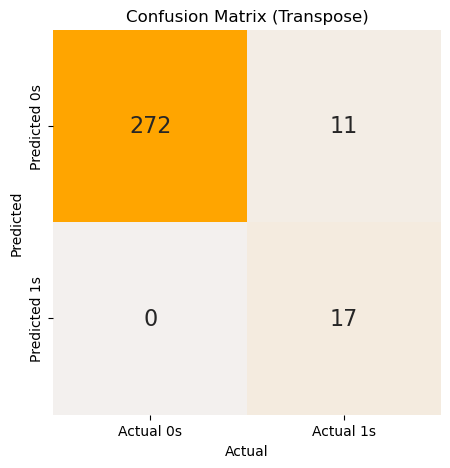

In [81]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, prediction)

# Transpose the confusion matrix
cm = cm.T

# Define color scheme
colors = sns.light_palette("orange", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, annot_kws={"size": 16}, cbar=False,
            xticklabels=['Actual 0s', 'Actual 1s'],
            yticklabels=['Predicted 0s', 'Predicted 1s'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Transpose)')
plt.show()

#  Imbalanced Dataset Techniques ---

## Upsampling Minority Class ---

Class count on upsampled data:
 0    921
1    921
Name: Fraud_Flag_Overall, dtype: int64
Accuracy on upsampled data: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       181

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369


Confusion Matrix:
 [[188   0]
 [  0 181]]
AUC-ROC on upsampled data: 1.0


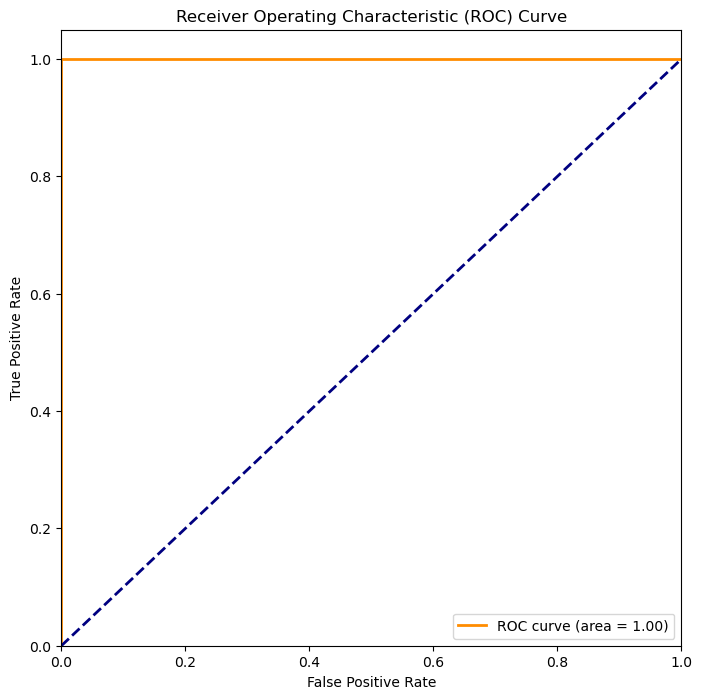

In [33]:
# To Increase the number of instances of the minority class by replicating them.

from sklearn.utils import resample

# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    return logreg, X_test, y_test, y_pred, y_pred_prob

# Separate majority and minority classes
df_majority = df[df.Fraud_Flag_Overall == 0]
df_minority = df[df.Fraud_Flag_Overall == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,          # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=0)        # to get reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print("Class count on upsampled data:\n", df_upsampled.Fraud_Flag_Overall.value_counts())

# Build the model on the balanced dataset and get the evaluation metrics
X_upsampled = df_upsampled.drop(['Fraud_Flag_Overall'], axis=1)
y_upsampled = df_upsampled.Fraud_Flag_Overall
lr_upsampled, X_test_upsampled, y_test_upsampled, y_pred_upsampled, y_pred_prob_upsampled = classification_model(
    X_upsampled, y_upsampled)

# Calculate and display accuracy for the upsampled dataset
accuracy_upsampled = accuracy_score(y_test_upsampled, y_pred_upsampled)
print(f'Accuracy on upsampled data: {accuracy_upsampled}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_upsampled, y_pred_upsampled))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_upsampled, y_pred_upsampled))

# Calculate AUC-ROC metrics and plot the curve
roc_auc_upsampled = roc_auc_score(y_test_upsampled, y_pred_prob_upsampled)
print(f'AUC-ROC on upsampled data: {roc_auc_upsampled}')

# Plot AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test_upsampled, y_pred_prob_upsampled)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_upsampled))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Downsampling Majority Class ---

Class count on downsampled data:
 0    79
1    79
Name: Fraud_Flag_Overall, dtype: int64
Accuracy on downsampled data: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


Confusion Matrix:
 [[15  0]
 [ 0 17]]
AUC-ROC on downsampled data: 1.0


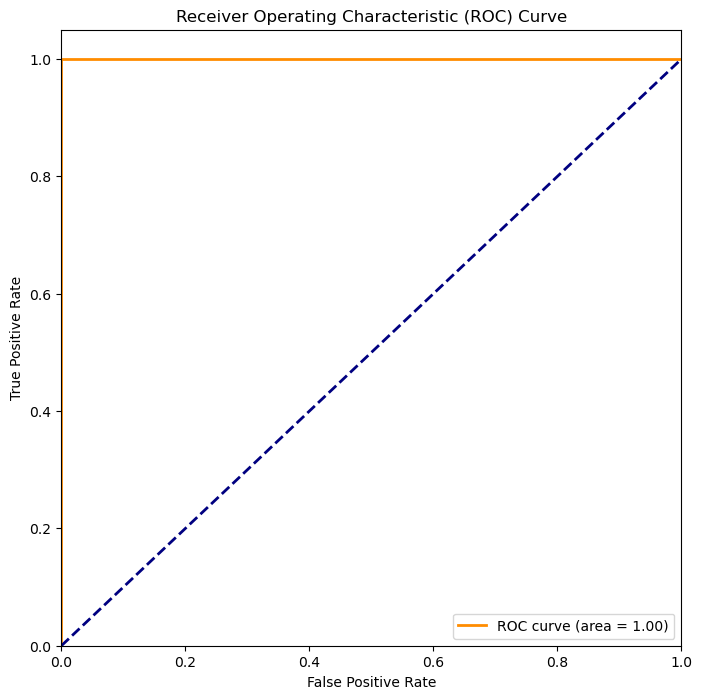

In [34]:
# The process involves randomly selecting a subset of the majority class instances 
# to match the size of the minority class.
# Decrease the number of instances of the majority class by randomly removing some.


# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    return logreg, X_test, y_test, y_pred, y_pred_prob

# Separate majority and minority classes
df_majority = df[df.Fraud_Flag_Overall == 0]
df_minority = df[df.Fraud_Flag_Overall == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,        # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=0)       # to get reproducible results

# Combine downsampled majority class with minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print("Class count on downsampled data:\n", df_downsampled.Fraud_Flag_Overall.value_counts())

# Build the model on the balanced dataset and get the evaluation metrics
X_downsampled = df_downsampled.drop(['Fraud_Flag_Overall'], axis=1)
y_downsampled = df_downsampled.Fraud_Flag_Overall
lr_downsampled, X_test_downsampled, y_test_downsampled, y_pred_downsampled, y_pred_prob_downsampled = classification_model(
    X_downsampled, y_downsampled)

# Calculate and display accuracy for the downsampled dataset
accuracy_downsampled = accuracy_score(y_test_downsampled, y_pred_downsampled)
print(f'Accuracy on downsampled data: {accuracy_downsampled}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_downsampled, y_pred_downsampled))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_downsampled, y_pred_downsampled))

# Calculate AUC-ROC metrics and plot the curve
roc_auc_downsampled = roc_auc_score(y_test_downsampled, y_pred_prob_downsampled)
print(f'AUC-ROC on downsampled data: {roc_auc_downsampled}')

# Plot AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test_downsampled, y_pred_prob_downsampled)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_downsampled))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Over Sampling with Imbalanced Learn

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC: 1.0


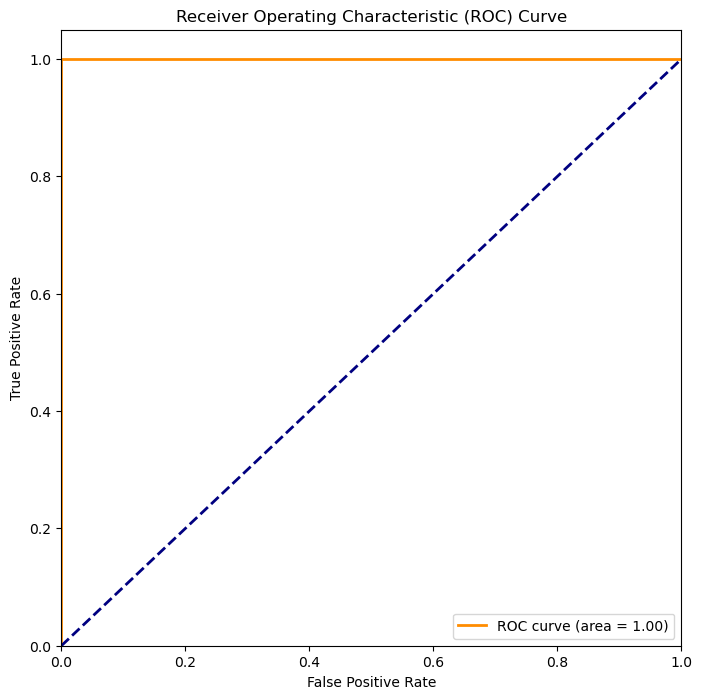


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        17

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[183   0]
 [  0  17]]


In [56]:
# Random Oversampling technique is used to balance the classes in the training set, 
# Thereafter, it trains a Classifier model, and evaluates its performance using various metrics. 


from imblearn.over_sampling import RandomOverSampler

# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Apply Random Oversampling to the training set
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Build your classification model (e.g., Logistic Regression)
    model = LogisticRegression()
    model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return model, X_test, y_test, y_pred_prob

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Build the model and get the evaluation metrics
logreg_model, X_test_logreg, y_test_logreg, y_pred_prob_logreg = classification_model(X, y)

# Calculate and display accuracy, precision, recall, and F1 score
y_pred_logreg = (y_pred_prob_logreg >= 0.5).astype(int)  # Binary predictions based on a threshold (e.g., 0.5)
accuracy_logreg = accuracy_score(y_test_logreg, y_pred_logreg)
precision_logreg = precision_score(y_test_logreg, y_pred_logreg)
recall_logreg = recall_score(y_test_logreg, y_pred_logreg)
f1_logreg = f1_score(y_test_logreg, y_pred_logreg)

print(f'Accuracy: {accuracy_logreg}')
print(f'Precision: {precision_logreg}')
print(f'Recall: {recall_logreg}')
print(f'F1 Score: {f1_logreg}')

# Calculate AUC-ROC metrics and plot the curve
roc_auc_logreg = roc_auc_score(y_test_logreg, y_pred_prob_logreg)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_logreg, y_pred_prob_logreg)

print(f'AUC-ROC: {roc_auc_logreg}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_logreg, y_pred_logreg))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_logreg, y_pred_logreg))

# SMOTE (Synthetic Minority Over-Sampling Technique)

Accuracy: 0.986449864498645
Precision: 1.0
Recall: 0.9726775956284153
F1 Score: 0.9861495844875346
AUC-ROC: 0.999529937129091


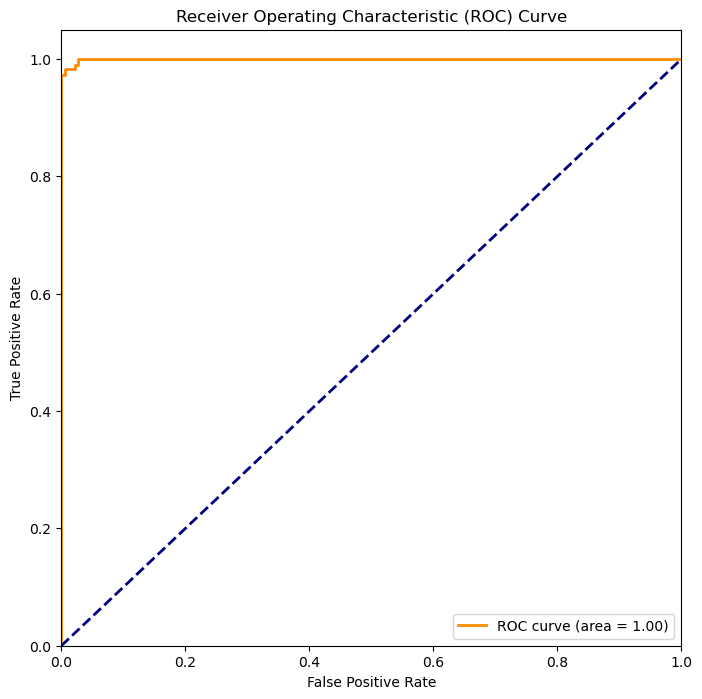


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       186
           1       1.00      0.97      0.99       183

    accuracy                           0.99       369
   macro avg       0.99      0.99      0.99       369
weighted avg       0.99      0.99      0.99       369


Confusion Matrix:
 [[186   0]
 [  5 178]]


In [44]:
# SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique 
# for handling imbalanced datasets by generating synthetic samples for the minority class.


from imblearn.over_sampling import SMOTE

# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    return logreg, X_test, y_test, y_pred, y_pred_prob

# Separate majority and minority classes
df_majority = df[df.Fraud_Flag_Overall == 0]
df_minority = df[df.Fraud_Flag_Overall == 1]

# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(df.drop(['Fraud_Flag_Overall'], axis=1), df['Fraud_Flag_Overall'])

# Build the model on the balanced dataset and get the evaluation metrics
lr_smote, X_test_smote, y_test_smote, y_pred_smote, y_pred_prob_smote = classification_model(X_smote, y_smote)

# Calculate and display accuracy, precision, recall, and F1 score
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
precision_smote = precision_score(y_test_smote, y_pred_smote)
recall_smote = recall_score(y_test_smote, y_pred_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)

print(f'Accuracy: {accuracy_smote}')
print(f'Precision: {precision_smote}')
print(f'Recall: {recall_smote}')
print(f'F1 Score: {f1_smote}')

# Calculate AUC-ROC metrics and plot the curve
roc_auc_smote = roc_auc_score(y_test_smote, y_pred_prob_smote)
print(f'AUC-ROC: {roc_auc_smote}')

# Plot AUC-ROC curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test_smote, y_pred_prob_smote)
plt.figure(figsize=(8, 8))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_smote, y_pred_smote))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_smote, y_pred_smote))

# Anomaly Detection - Isolation Forest ---

Accuracy: 0.865
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.2684024429443909


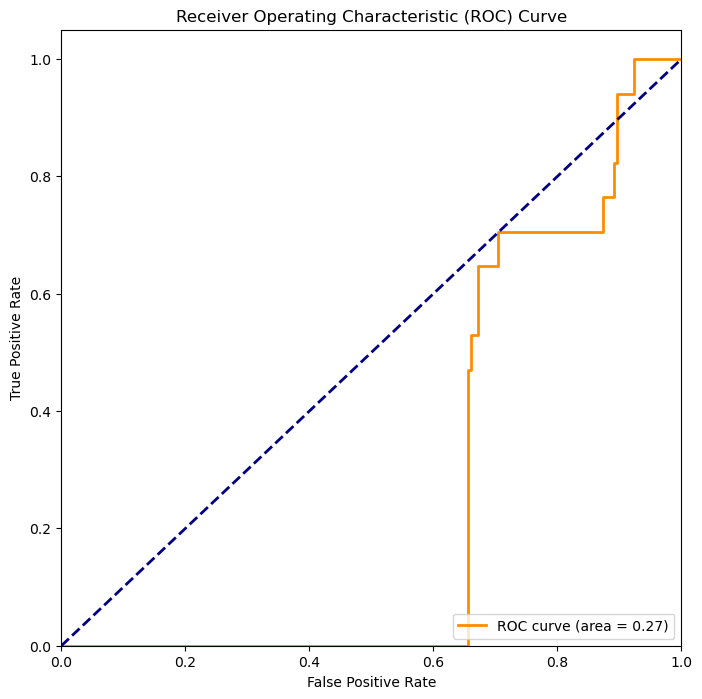


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       183
           1       0.00      0.00      0.00        17

    accuracy                           0.86       200
   macro avg       0.46      0.47      0.46       200
weighted avg       0.83      0.86      0.85       200


Confusion Matrix:
 [[173  10]
 [ 17   0]]


In [42]:
# Isolation Forest is used for anomaly detection (identifying fraudulent instances as anomalies). 
# The contamination parameter is set to 0.05, but one can adjust it based on the dataset characteristics. 
# While dealing with a binary classification problem (0 or 1 labels), the decision function of the 
# Isolation Forest can be used to calculate the AUC-ROC score.


from sklearn.ensemble import IsolationForest

# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    y_pred = isolation_forest.fit_predict(X_test)
    y_pred = np.where(y_pred == 1, 0, 1)  # Convert predictions to binary labels
    y_pred_score = isolation_forest.decision_function(X_test)
    return isolation_forest, X_test, y_test, y_pred, y_pred_score

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Build the model and get the evaluation metrics
isolation_forest, X_test_iso, y_test_iso, y_pred_iso, y_pred_score_iso = classification_model(X, y)

# Calculate and display accuracy, precision, recall, and F1 score
accuracy_iso = accuracy_score(y_test_iso, y_pred_iso)
precision_iso = precision_score(y_test_iso, y_pred_iso)
recall_iso = recall_score(y_test_iso, y_pred_iso)
f1_iso = f1_score(y_test_iso, y_pred_iso)

print(f'Accuracy: {accuracy_iso}')
print(f'Precision: {precision_iso}')
print(f'Recall: {recall_iso}')
print(f'F1 Score: {f1_iso}')

# Calculate AUC-ROC metrics and plot the curve
roc_auc_iso = roc_auc_score(y_test_iso, y_pred_score_iso)
fpr_iso, tpr_iso, thresholds_iso = roc_curve(y_test_iso, y_pred_score_iso)

print(f'AUC-ROC: {roc_auc_iso}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_iso, tpr_iso, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_iso))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_iso, y_pred_iso))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_iso, y_pred_iso))

# Anomaly Detection - One Class SVM ---

Accuracy: 0.765
Precision: 0.058823529411764705
Recall: 0.11764705882352941
F1 Score: 0.07843137254901962
AUC-ROC: 0.34747669559627126


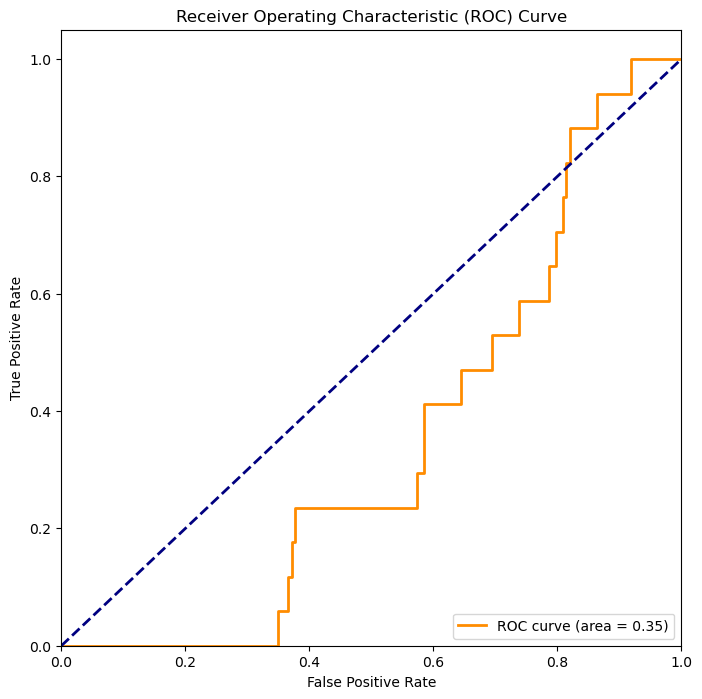


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       183
           1       0.06      0.12      0.08        17

    accuracy                           0.77       200
   macro avg       0.48      0.47      0.47       200
weighted avg       0.84      0.77      0.80       200


Confusion Matrix:
 [[151  32]
 [ 15   2]]


In [46]:
from sklearn.svm import OneClassSVM

# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    one_class_svm = OneClassSVM(nu=0.05)  # Adjust nu parameter based on your dataset
    one_class_svm.fit(X_train)
    y_pred = one_class_svm.predict(X_test)
    y_pred = np.where(y_pred == 1, 0, 1)  # Convert predictions to binary labels
    return one_class_svm, X_test, y_test, y_pred

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Build the model and get the evaluation metrics
one_class_svm, X_test_svm, y_test_svm, y_pred_svm = classification_model(X, y)

# Calculate and display accuracy, precision, recall, and F1 score
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
precision_svm = precision_score(y_test_svm, y_pred_svm)
recall_svm = recall_score(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm)

print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 Score: {f1_svm}')

# Calculate AUC-ROC metrics and plot the curve
decision_function_svm = one_class_svm.decision_function(X_test_svm)
roc_auc_svm = roc_auc_score(y_test_svm, decision_function_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_svm, decision_function_svm)

print(f'AUC-ROC: {roc_auc_svm}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_svm, y_pred_svm))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_svm, y_pred_svm))

# ADASYN (Adaptive Synthetic Sampling Approach) 

Accuracy: 0.96
Precision: 0.68
Recall: 1.0
F1 Score: 0.8095238095238095
AUC-ROC: 0.9707489553198329


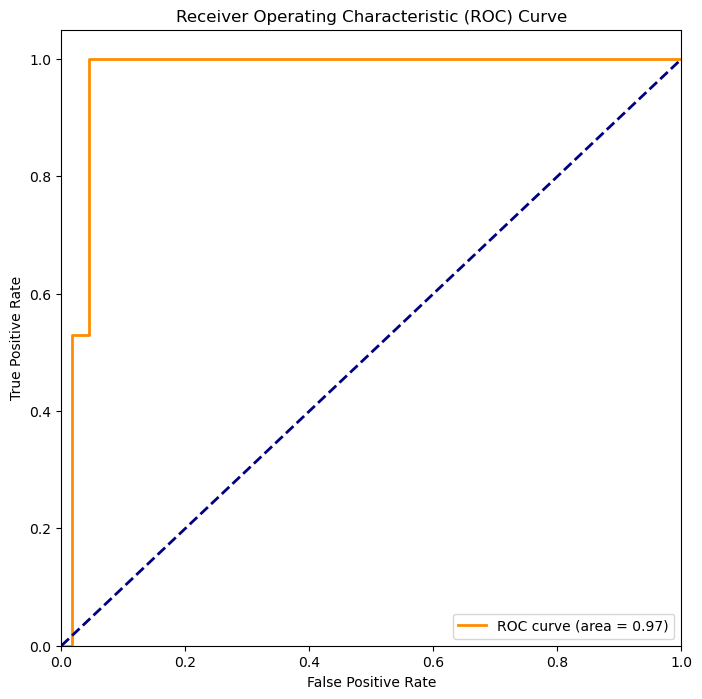


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       183
           1       0.68      1.00      0.81        17

    accuracy                           0.96       200
   macro avg       0.84      0.98      0.89       200
weighted avg       0.97      0.96      0.96       200


Confusion Matrix:
 [[175   8]
 [  0  17]]


In [50]:
from imblearn.over_sampling import ADASYN

# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
    
    # Build your classification model (e.g., Logistic Regression)
    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return model, X_test, y_test, y_pred, y_pred_prob

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Build the model and get the evaluation metrics
adasyn_model, X_test_adasyn, y_test_adasyn, y_pred_adasyn, y_pred_prob_adasyn = classification_model(X, y)

# Calculate and display accuracy, precision, recall, and F1 score
accuracy_adasyn = accuracy_score(y_test_adasyn, y_pred_adasyn)
precision_adasyn = precision_score(y_test_adasyn, y_pred_adasyn)
recall_adasyn = recall_score(y_test_adasyn, y_pred_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)

print(f'Accuracy: {accuracy_adasyn}')
print(f'Precision: {precision_adasyn}')
print(f'Recall: {recall_adasyn}')
print(f'F1 Score: {f1_adasyn}')

# Calculate AUC-ROC metrics and plot the curve
roc_auc_adasyn = roc_auc_score(y_test_adasyn, y_pred_prob_adasyn)
fpr_adasyn, tpr_adasyn, thresholds_adasyn = roc_curve(y_test_adasyn, y_pred_prob_adasyn)

print(f'AUC-ROC: {roc_auc_adasyn}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_adasyn, tpr_adasyn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_adasyn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_adasyn, y_pred_adasyn))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_adasyn, y_pred_adasyn))

# Near Miss ---

Accuracy: 0.845
Precision: 0.3541666666666667
Recall: 1.0
F1 Score: 0.5230769230769231
AUC-ROC: 0.8482802957248474


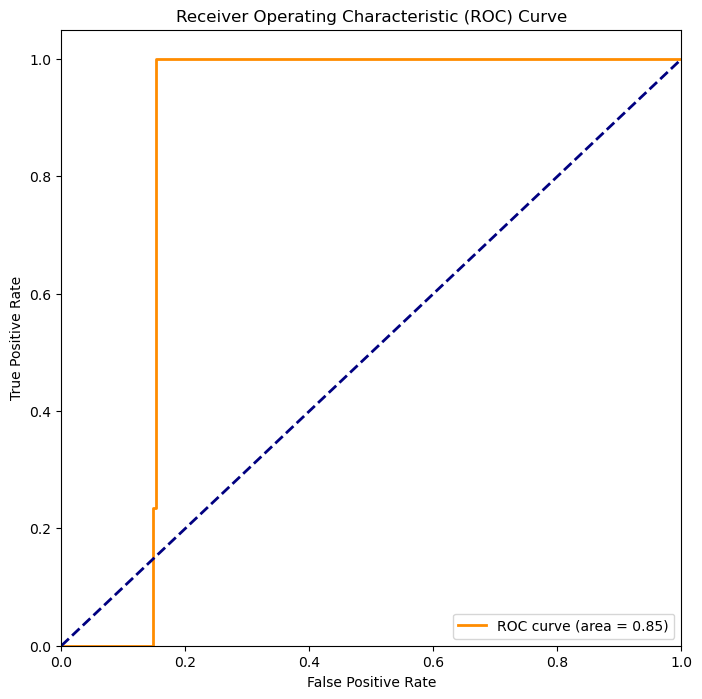


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       183
           1       0.35      1.00      0.52        17

    accuracy                           0.84       200
   macro avg       0.68      0.92      0.72       200
weighted avg       0.95      0.84      0.87       200


Confusion Matrix:
 [[152  31]
 [  0  17]]


In [49]:
# 


from imblearn.under_sampling import NearMiss

# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Apply Near Miss to balance the dataset
    nm = NearMiss(version=2)
    X_resampled, y_resampled = nm.fit_resample(X_train, y_train)
    
    # Build your classification model (e.g., Logistic Regression)
    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return model, X_test, y_test, y_pred, y_pred_prob

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Build the model and get the evaluation metrics
near_miss_model, X_test_near_miss, y_test_near_miss, y_pred_near_miss, y_pred_prob_near_miss = classification_model(X, y)

# Calculate and display accuracy, precision, recall, and F1 score
accuracy_near_miss = accuracy_score(y_test_near_miss, y_pred_near_miss)
precision_near_miss = precision_score(y_test_near_miss, y_pred_near_miss)
recall_near_miss = recall_score(y_test_near_miss, y_pred_near_miss)
f1_near_miss = f1_score(y_test_near_miss, y_pred_near_miss)

print(f'Accuracy: {accuracy_near_miss}')
print(f'Precision: {precision_near_miss}')
print(f'Recall: {recall_near_miss}')
print(f'F1 Score: {f1_near_miss}')

# Calculate AUC-ROC metrics and plot the curve
roc_auc_near_miss = roc_auc_score(y_test_near_miss, y_pred_prob_near_miss)
fpr_near_miss, tpr_near_miss, thresholds_near_miss = roc_curve(y_test_near_miss, y_pred_prob_near_miss)

print(f'AUC-ROC: {roc_auc_near_miss}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_near_miss, tpr_near_miss, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_near_miss))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_near_miss, y_pred_near_miss))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_near_miss, y_pred_near_miss))


# Tomek Links ---

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC: 1.0


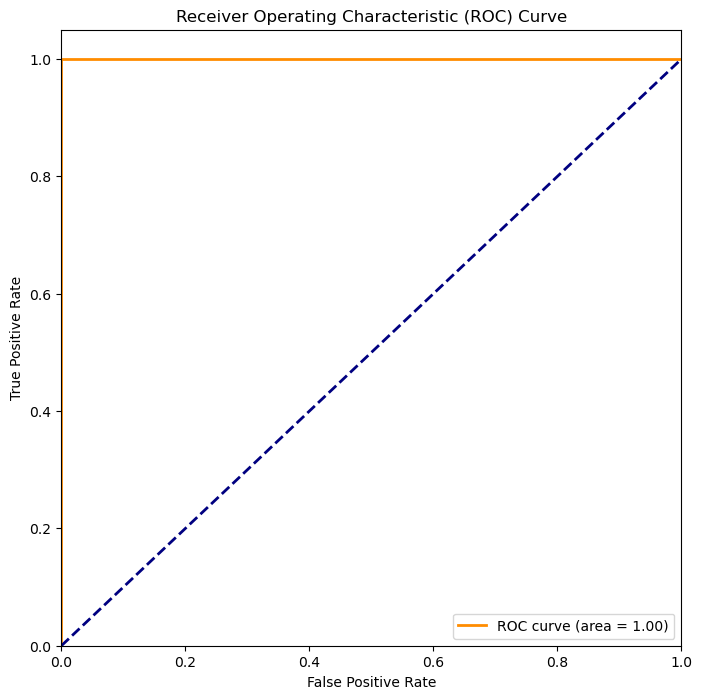


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        17

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[183   0]
 [  0  17]]


In [51]:
# Tomek Links technique is used for undersampling the majority class.
# Thereafter, this algorithm fits a model to the balanced dataset.


from imblearn.under_sampling import TomekLinks

# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Apply Tomek Links to balance the dataset
    tl = TomekLinks()
    X_resampled, y_resampled = tl.fit_resample(X_train, y_train)
    
    # Build your classification model (e.g., Logistic Regression)
    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return model, X_test, y_test, y_pred, y_pred_prob

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Build the model and get the evaluation metrics
tomek_links_model, X_test_tomek_links, y_test_tomek_links, y_pred_tomek_links, y_pred_prob_tomek_links = classification_model(X, y)

# Calculate and display accuracy, precision, recall, and F1 score
accuracy_tomek_links = accuracy_score(y_test_tomek_links, y_pred_tomek_links)
precision_tomek_links = precision_score(y_test_tomek_links, y_pred_tomek_links)
recall_tomek_links = recall_score(y_test_tomek_links, y_pred_tomek_links)
f1_tomek_links = f1_score(y_test_tomek_links, y_pred_tomek_links)

print(f'Accuracy: {accuracy_tomek_links}')
print(f'Precision: {precision_tomek_links}')
print(f'Recall: {recall_tomek_links}')
print(f'F1 Score: {f1_tomek_links}')

# Calculate AUC-ROC metrics and plot the curve
roc_auc_tomek_links = roc_auc_score(y_test_tomek_links, y_pred_prob_tomek_links)
fpr_tomek_links, tpr_tomek_links, thresholds_tomek_links = roc_curve(y_test_tomek_links, y_pred_prob_tomek_links)

print(f'AUC-ROC: {roc_auc_tomek_links}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_tomek_links, tpr_tomek_links, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_tomek_links))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_tomek_links, y_pred_tomek_links))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_tomek_links, y_pred_tomek_links))


# Cost-Sensitive Learning Technique ---

Accuracy: 0.915
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.02057216329154615


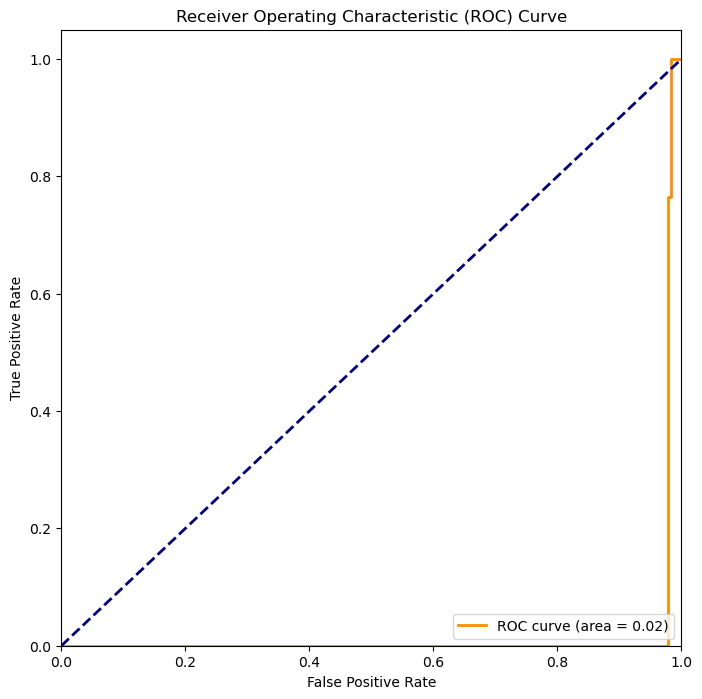


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       183
           1       0.00      0.00      0.00        17

    accuracy                           0.92       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.84      0.92      0.87       200


Confusion Matrix:
 [[183   0]
 [ 17   0]]


In [52]:
# Cost-sensitive learning involves assigning different misclassification costs to different classes


from sklearn.svm import SVC

# Assuming your classification_model function is defined as follows
def classification_model(X, y, class_weight=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Build your classification model (e.g., Support Vector Classifier)
    model = SVC(class_weight=class_weight, probability=True)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return model, X_test, y_test, y_pred, y_pred_prob

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Assign different misclassification costs to different classes
class_weight = {0: 1, 1: 5}  # Adjust the weights based on your problem

# Build the model and get the evaluation metrics
cost_sensitive_model, X_test_cost_sensitive, y_test_cost_sensitive, y_pred_cost_sensitive, y_pred_prob_cost_sensitive = classification_model(X, y, class_weight)

# Calculate and display accuracy, precision, recall, and F1 score
accuracy_cost_sensitive = accuracy_score(y_test_cost_sensitive, y_pred_cost_sensitive)
precision_cost_sensitive = precision_score(y_test_cost_sensitive, y_pred_cost_sensitive)
recall_cost_sensitive = recall_score(y_test_cost_sensitive, y_pred_cost_sensitive)
f1_cost_sensitive = f1_score(y_test_cost_sensitive, y_pred_cost_sensitive)

print(f'Accuracy: {accuracy_cost_sensitive}')
print(f'Precision: {precision_cost_sensitive}')
print(f'Recall: {recall_cost_sensitive}')
print(f'F1 Score: {f1_cost_sensitive}')

# Calculate AUC-ROC metrics and plot the curve
roc_auc_cost_sensitive = roc_auc_score(y_test_cost_sensitive, y_pred_prob_cost_sensitive)
fpr_cost_sensitive, tpr_cost_sensitive, thresholds_cost_sensitive = roc_curve(y_test_cost_sensitive, y_pred_prob_cost_sensitive)

print(f'AUC-ROC: {roc_auc_cost_sensitive}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_cost_sensitive, tpr_cost_sensitive, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cost_sensitive))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_cost_sensitive, y_pred_cost_sensitive))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_cost_sensitive, y_pred_cost_sensitive))

# Cost Sensitive Learning with XG Boost ---

Accuracy: 0.995
Precision: 1.0
Recall: 0.9411764705882353
F1 Score: 0.9696969696969697
AUC-ROC: 0.9713918354226937


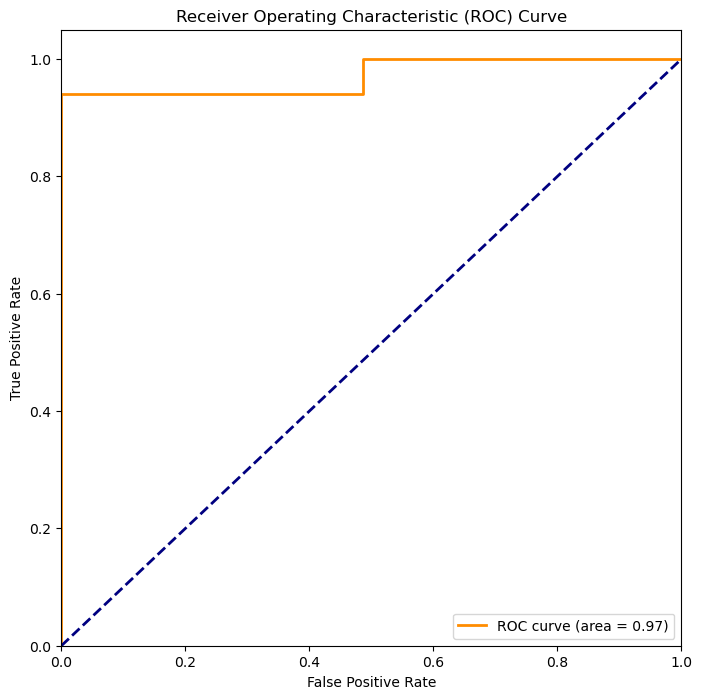


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       183
           1       1.00      0.94      0.97        17

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200


Confusion Matrix:
 [[183   0]
 [  1  16]]


In [53]:
import xgboost as xgb

# Assuming your classification_model function is defined as follows
def classification_model(X, y, scale_pos_weight=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Build your XGBoost model
    model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return model, X_test, y_test, y_pred, y_pred_prob

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Calculate the scale_pos_weight based on the class distribution
scale_pos_weight = len(df[df['Fraud_Flag_Overall'] == 0]) / len(df[df['Fraud_Flag_Overall'] == 1])

# Build the model and get the evaluation metrics
xgboost_model, X_test_xgboost, y_test_xgboost, y_pred_xgboost, y_pred_prob_xgboost = classification_model(X, y, scale_pos_weight)

# Calculate and display accuracy, precision, recall, and F1 score
accuracy_xgboost = accuracy_score(y_test_xgboost, y_pred_xgboost)
precision_xgboost = precision_score(y_test_xgboost, y_pred_xgboost)
recall_xgboost = recall_score(y_test_xgboost, y_pred_xgboost)
f1_xgboost = f1_score(y_test_xgboost, y_pred_xgboost)

print(f'Accuracy: {accuracy_xgboost}')
print(f'Precision: {precision_xgboost}')
print(f'Recall: {recall_xgboost}')
print(f'F1 Score: {f1_xgboost}')

# Calculate AUC-ROC metrics and plot the curve
roc_auc_xgboost = roc_auc_score(y_test_xgboost, y_pred_prob_xgboost)
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test_xgboost, y_pred_prob_xgboost)

print(f'AUC-ROC: {roc_auc_xgboost}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_xgboost, tpr_xgboost, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgboost))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_xgboost, y_pred_xgboost))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_xgboost, y_pred_xgboost))

# Probability Threshold Tuning ---

Best Threshold: 0.1


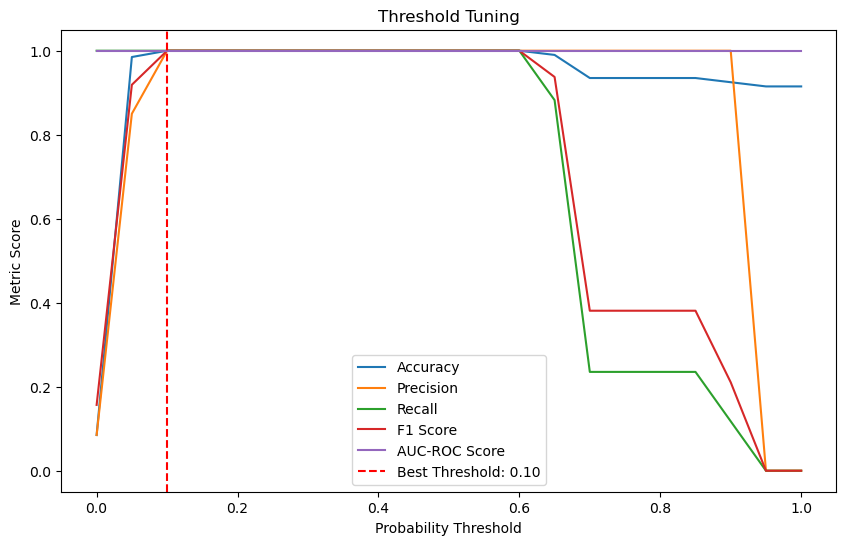


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        17

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[183   0]
 [  0  17]]
AUC-ROC on Tuned Data: 1.0


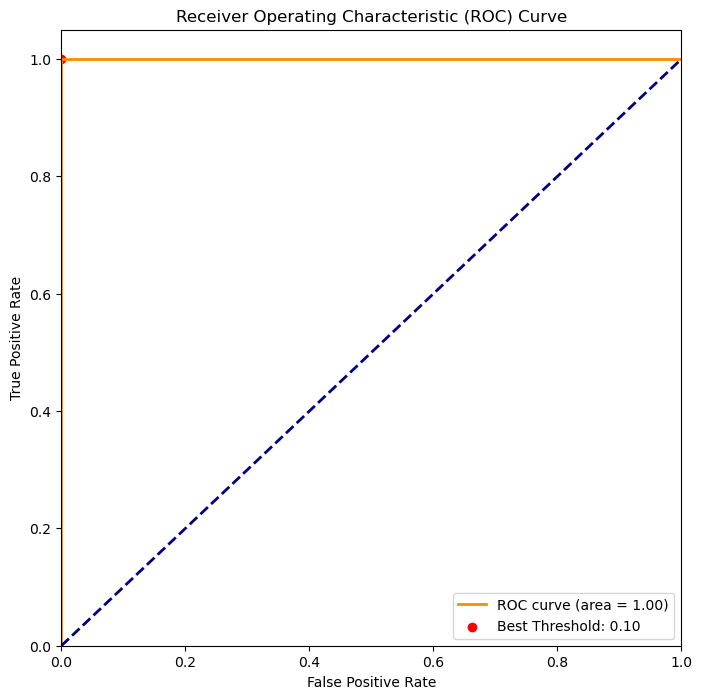

In [55]:
# To perform probability threshold tuning, the predicted probabilities are invoked/used from the classification model 
# and the threshold is adjusted accordingly to get different sets of predictions


# Assuming your classification_model function is defined as follows
def classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Build your classification model (e.g., Logistic Regression)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return model, X_test, y_test, y_pred_prob

# Assuming 'df' is your DataFrame with dependent variable 'Fraud_Flag_Overall' and independent variables
X = df.drop(['Fraud_Flag_Overall'], axis=1)
y = df['Fraud_Flag_Overall']

# Build the model and get the evaluation metrics
logreg_model, X_test_logreg, y_test_logreg, y_pred_prob_logreg = classification_model(X, y)

# Choose a range of thresholds to test
thresholds = np.arange(0, 1.05, 0.05)

# Initialize lists to store evaluation metrics for each threshold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_prob_logreg >= threshold).astype(int)
    
    # Calculate and store evaluation metrics
    accuracy_scores.append(accuracy_score(y_test_logreg, y_pred))
    precision_scores.append(precision_score(y_test_logreg, y_pred))
    recall_scores.append(recall_score(y_test_logreg, y_pred))
    f1_scores.append(f1_score(y_test_logreg, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test_logreg, y_pred_prob_logreg))

# Find the threshold that maximizes F1 score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Display the results
print(f'Best Threshold: {best_threshold}')

# Plot the evaluation metrics over different thresholds
plt.figure(figsize=(10, 6))

plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, roc_auc_scores, label='AUC-ROC Score')

plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')

plt.xlabel('Probability Threshold')
plt.ylabel('Metric Score')
plt.title('Threshold Tuning')
plt.legend()
plt.show()

# Apply the best threshold to get final predictions
final_predictions = (y_pred_prob_logreg >= best_threshold).astype(int)

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test_logreg, final_predictions))
print('\nConfusion Matrix:\n', confusion_matrix(y_test_logreg, final_predictions))

# Calculate AUC-ROC metrics and plot the curve with the best threshold
roc_auc_logreg_tuned = roc_auc_score(y_test_logreg, y_pred_prob_logreg)
fpr_logreg_tuned, tpr_logreg_tuned, thresholds_logreg_tuned = roc_curve(y_test_logreg, y_pred_prob_logreg)

print(f'AUC-ROC on Tuned Data: {roc_auc_logreg_tuned}')

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_logreg_tuned, tpr_logreg_tuned, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg_tuned))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_logreg_tuned[best_threshold_index], tpr_logreg_tuned[best_threshold_index], c='red', marker='o', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Stratified K-fold Split ---

In [57]:
# Initialize standard scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set, and transform the test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your classifier
classifier = LogisticRegression()  # Replace with your desired classifier

# Assuming 'X_train' and 'y_train' are your training data
# Replace 'n_splits' with the number of desired folds (e.g., 5)
n_splits = 3
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []

# Perform Stratified k-Fold Cross-Validation on the training set
for train_index, val_index in stratified_kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

In [58]:
# Class Ratio for the dependant variable ---

print('Class Ratio:',sum(df['Fraud_Flag_Overall'])/len(df['Fraud_Flag_Overall']))

Class Ratio: 0.079


In [59]:
# To initialise a Stratified KFold object

skf = StratifiedKFold(n_splits = 3) 

target = df.loc[:,'Fraud_Flag_Overall']

In [60]:
fold_no = 1
for train_index, test_index in skf.split(df, target):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    print('Fold',str(fold_no),'Class Ratio:',sum(test['Fraud_Flag_Overall'])/len(test['Fraud_Flag_Overall']))
    fold_no += 1   


Fold 1 Class Ratio: 0.08083832335329341
Fold 2 Class Ratio: 0.07807807807807808
Fold 3 Class Ratio: 0.07807807807807808


In [61]:
model = LogisticRegression()

def train_model(train, test, fold_no):
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('Fold',str(fold_no),'Accuracy:', accuracy_score(y_test,predictions))   


In [62]:
fold_no = 1
for train_index, test_index in skf.split(df, target):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

ValueError: Boolean array expected for the condition, not float64

In [63]:
from sklearn.metrics import accuracy_score

fold_no = 1
for train_index, test_index in skf.split(df, target):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    print('Fold', str(fold_no), 'Class Ratio:', sum(test['Fraud_Flag_Overall']) / len(test['Fraud_Flag_Overall']))

    # Extract features and target variable
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]

    # Train Logistic Regression model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, predictions)
    print('Fold', str(fold_no), 'Accuracy:', accuracy)

    fold_no += 1


Fold 1 Class Ratio: 0.08083832335329341


ValueError: Boolean array expected for the condition, not float64

In [64]:
# Alternative Method ---
_# Stratified K-fold Split ---

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Assuming 'X_train' and 'y_train' are your training data
# Assuming 'n_splits' is the number of desired folds (e.g., 5)

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(
        LogisticRegression(max_iter=4000, solver=algo, random_state=42),
        X_train, y_train, cv=kf, scoring="accuracy"
    )
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')

Average score(newton-cg): 0.994
Average score(lbfgs): 0.994
Average score(liblinear): 0.991
Average score(sag): 0.915
Average score(saga): 0.911


# Logistic Regression

In [65]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression  # Replace with your desired classifier

# Assuming 'X' is your feature matrix and 'y' is the corresponding target variable
# Replace 'your_classifier' with the classifier of your choice (e.g., LogisticRegression, RandomForest, etc.)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize standard scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set, and transform the test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your classifier
classifier = LogisticRegression()  # Replace with your desired classifier

# Assuming 'X_train' and 'y_train' are your training data
# Replace 'n_splits' with the number of desired folds (e.g., 5)
n_splits = 3
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []

# Perform Stratified k-Fold Cross-Validation on the training set
for train_index, val_index in stratified_kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train your classifier on the training set for this fold
    classifier.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set for this fold
    predictions_val_fold = classifier.predict(X_val_fold)

    # Calculate and store accuracy for this fold
    accuracy_fold = accuracy_score(y_val_fold, predictions_val_fold)
    accuracy_scores.append(accuracy_fold)

# Display the accuracy for each fold
for i, accuracy_fold in enumerate(accuracy_scores):
    print(f'Fold {i + 1}: Accuracy = {accuracy_fold}')

# Display the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / n_splits
print(f'Average Accuracy: {average_accuracy}')


Fold 1: Accuracy = 0.9700854700854701
Fold 2: Accuracy = 0.9914163090128756
Fold 3: Accuracy = 0.9570815450643777
Average Accuracy: 0.9728611080542411


# Decision Tree Classifier 

In [66]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [67]:
# Decision Tree Classifier Tuning - Model Tuning using k-fold split ---

kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.940
Average score(2): 0.953
Average score(3): 0.976
Average score(4): 0.994
Average score(5): 1.000
Average score(6): 1.000
Average score(7): 1.000
Average score(8): 1.000
Average score(9): 1.000
Average score(10): 1.000


# Random Forest Classifier 

In [68]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1.]
Average score: 1.00


In [69]:
# Random Forest Classifier Tuning ---

# Assuming 'X_train' and 'y_train' are your training data
# Assuming 'n_splits' is the number of desired folds (e.g., 5)
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(
        RandomForestClassifier(n_estimators=val, random_state=42),
        X_train, y_train, cv=kf, scoring="accuracy"
    )
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 1.000
Average score(100): 1.000
Average score(150): 1.000
Average score(200): 1.000
Average score(250): 1.000
Average score(300): 1.000
Average score(350): 1.000
